In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from FRED_data_pull import *
from pathlib import Path
from datetime import datetime, timedelta
import os
import dotenv
dotenv.load_dotenv()
api_key = os.environ['FRED_API_KEY']
from dateutil.relativedelta import relativedelta
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
ppi = pull_data(['PPIFIS'],
                 'm', api_key)
core_ppi = pull_data(['PPIFES'],
                 'm', api_key)
diesel = pull_data(['GASDESW'],
                 'm', api_key)
gasoline = pull_data(['GASREGW'],
                 'm', api_key)
crude = pull_data(['DCOILWTICO'],
                 'm', api_key)
dollar = pull_data(['DTWEXBGS'],
                 'm', api_key)
unemployment = pull_data(['UNRATE'],
                 'm', api_key)
metal = pull_data(['PMETAINDEXM'],
                 'm', api_key)
inflation_expectations = pull_data(['T5YIE'],
                 'm', api_key)
corn = pull_data(['PMAIZMTUSDM'],
                 'm', api_key)
wheat = pull_data(['PWHEAMTUSDM'],
                 'm', api_key)
soybeans = pull_data(['PSOYBUSDM'],
                 'm', api_key)

C:\Users\alex.zhang\AppData\Local\anaconda3\envs\transports\lib\site-packages\urllib3\connectionpool.py:1056: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.stlouisfed.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\alex.zhang\AppData\Local\anaconda3\envs\transports\lib\site-packages\urllib3\connectionpool.py:1056: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.stlouisfed.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\alex.zhang\AppData\Local\anaconda3\envs\transports\lib\site-packages\urllib3\connectionpool.py:1056: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.stlouisfed.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1

In [3]:
file_path = Path("ism_services_df.xlsx")
ism_services_df = pd.read_excel(file_path).set_index('date')
file_path = Path("ism_manufacturing_df.xlsx")
ism_manufacturing_df = pd.read_excel(file_path).set_index('date')
file_path = Path("dxy_df.xlsx")
dxy_df = pd.read_excel(file_path).set_index('date')
file_path = Path("philly_services_df.xlsx")
philly_services_df = pd.read_excel(file_path).set_index('date')
file_path = Path("philly_manufacturing_df.xlsx")
philly_manufacturing_df = pd.read_excel(file_path).set_index('date')
file_path = Path("empire_manufacturing_df.xlsx")
empire_manufacturing_df = pd.read_excel(file_path).set_index('date')
file_path = Path("nfib_prices_df.xlsx")
nfib_prices_df = pd.read_excel(file_path).set_index('date')
#file_path = Path("Adobe DPI.xlsx")
#adbe_df = pd.read_excel(file_path).set_index('date')

In [4]:
data_raw = pd.DataFrame()
#data_raw['DXY'] = dollar
data_raw['Diesel'] = diesel
data_raw['Gasoline'] = gasoline
data_raw['Crude'] = crude
data_raw['Corn'] = corn
data_raw['Wheat'] = wheat
data_raw['Soybeans'] = soybeans
data_raw['Unemployment'] = unemployment
data_raw['Expectations'] = inflation_expectations
#data_raw['Metals'] = metal
data_raw['PPI'] = ppi
data_raw['Core PPI'] = core_ppi

data_raw['DXY'] = dxy_df

data_raw = data_raw[::-1]

In [5]:
data = (np.log(data_raw).diff()*100)[1:]
data['Unemployment'] = (data_raw['Unemployment'].diff()*100)[1:]
#data['EXPINF2YR'] = (data_raw['EXPINF2YR'].diff()*1200)[1:]
data['Expectations'] = (data_raw['Expectations'].diff()*100)[1:]

#data.iloc[-2,3] = np.nan
#data.iloc[-2,4] = np.nan
#data.iloc[-2,5] = np.nan
#data.iloc[-2,6] = np.nan
#data.iloc[-2,7] = np.nan
data.iloc[-1,8] = np.nan
data.iloc[-1,9] = np.nan

C:\Users\alex.zhang\AppData\Local\anaconda3\envs\transports\lib\site-packages\pandas\core\internals\blocks.py:329: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


In [6]:
data['ISM Services'] = ism_services_df 
data['ISM Manufacturing'] = ism_manufacturing_df 
#data['Empire Manufacturing'] = empire_manufacturing_df 
#data['Philly Services'] = philly_services_df 
#data['Philly Manufacturing'] = philly_manufacturing_df 
#data['NFIB Price Plans'] = nfib_prices_df
#data['Adobe DPI'] = adbe_df*1200
data['Philly Empire Average'] = (philly_manufacturing_df['philly_index'] + empire_manufacturing_df['empire_index']) / 2

In [7]:
data = data[data.index >= '2010-05-31']
#data = data[data.index >= '2011-03-31']
#data = data[data.index >= '2014-01-31']

In [8]:
## Seasonal Adjustment

# Decompose
#decomposition = sm.tsa.seasonal_decompose(data['Gasoline'], model='additive')

# Extract the components
#trend = decomposition.trend
#seasonal = decomposition.seasonal
#residual = decomposition.resid

# Seasonally adjust
#data['Gasoline'] = data['Gasoline'] - seasonal


In [9]:
# Decompose
#decomposition = sm.tsa.seasonal_decompose(data['Import Prices'], model='additive')

# Extract the components
#trend = decomposition.trend
#seasonal = decomposition.seasonal
#residual = decomposition.resid

# Seasonally adjust
#data['Import Prices'] = data['Import Prices'] - seasonal

In [10]:
data.corr()

,Diesel,Gasoline,Crude,Corn,Wheat,Soybeans,Unemployment,Expectations,PPI,Core PPI,DXY,ISM Services,ISM Manufacturing,Philly Empire Average
Diesel,1.000000,0.784864,0.542761,0.265030,0.116640,0.188498,-0.167942,0.499739,0.694493,0.343967,-0.102199,0.448280,0.581128,0.385064
Gasoline,0.784864,1.000000,0.636189,0.245643,0.074647,0.239739,-0.307690,0.486854,0.637050,0.281140,-0.229642,0.316308,0.470808,0.251199
Crude,0.542761,0.636189,1.000000,0.160602,-0.014111,0.171038,-0.501223,0.562406,0.486410,0.132820,-0.408426,0.211493,0.287087,0.126116
Corn,0.265030,0.245643,0.160602,1.000000,0.596119,0.625840,-0.151829,0.211965,0.304193,0.202102,-0.168296,0.183403,0.282730,0.153944
Wheat,0.116640,0.074647,-0.014111,0.596119,1.000000,0.488740,0.031430,0.146805,0.192325,0.156526,-0.216024,0.150359,0.217763,0.121488
Soybeans,0.188498,0.239739,0.171038,0.625840,0.488740,1.000000,-0.084879,0.239601,0.238198,0.151846,-0.343591,0.128746,0.147903,0.054332
Unemployment,-0.167942,-0.307690,-0.501223,-0.151829,0.031430,-0.084879,1.000000,-0.069314,-0.335158,-0.174808,0.155357,-0.091322,-0.144134,-0.125703
Expectations,0.499739,0.486854,0.562406,0.211965,0.146805,0.239601,-0.069314,1.000000,0.355768,0.161195,-0.357897,0.198864,0.250564,0.072024
PPI,0.694493,0.637050,0.486410,0.304193,0.192325,0.238198,-0.335158,0.355768,1.000000,0.807986,-0.141819,0.663298,0.680842,0.613783
Core PPI,0.343967,0.281140,0.132820,0.202102,0.156526,0.151846,-0.174808,0.161195,0.807986,1.000000,0.004644,0.610242,0.565985,0.627325


In [12]:
data.tail()

,Diesel,Gasoline,Crude,Corn,Wheat,Soybeans,Unemployment,Expectations,PPI,Core PPI,DXY,ISM Services,ISM Manufacturing,Philly Empire Average
date,,,,,,,,,,,,,,
2024-03-31,-0.545501,6.449960,5.085307,0.674871,-3.432214,0.880679,-10.0,6.0,-0.069009,-0.012745,-0.308262,53.4,55.8,16.20
2024-04-30,-0.498506,5.259134,4.886047,0.353079,-1.646465,-1.301407,10.0,7.0,0.493169,0.488107,1.209513,59.2,60.9,28.35
2024-05-31,-4.602039,-0.221791,-6.448385,5.165178,8.747447,4.472261,10.0,-12.0,-0.027759,0.279358,-0.232063,58.1,57.0,23.50
2024-06-30,-2.651269,-4.194437,-0.312911,-4.986766,-10.273381,-3.762203,10.0,-12.0,0.223932,0.442418,1.462441,56.3,52.1,NaN
2024-07-31,2.336803,0.835860,2.512975,NaN,NaN,NaN,20.0,-3.0,NaN,NaN,-0.250331,57.0,52.9,NaN


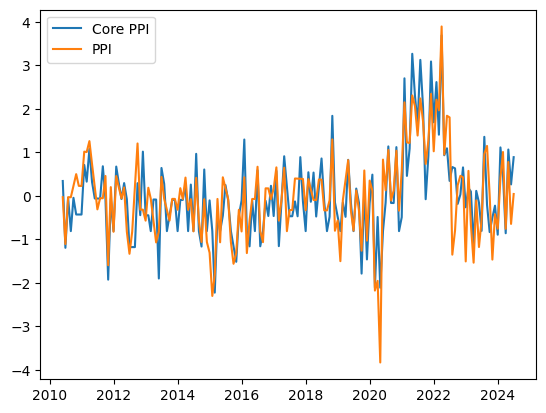

In [13]:
data_norm = (data - data.mean()) / data.std()
var_name_1 = 'Core PPI'
var_name_2 = 'PPI'
plt.plot(data_norm.index, data_norm[var_name_1], label=var_name_1)
plt.plot(data_norm.index, data_norm[var_name_2], label=var_name_2)
plt.legend()
plt.show()

## PCA (To Get K_Factor)

In [14]:
# Standardize the features (important for PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data.dropna())

n_components = 5  # Choose the number of components (dimensions) you want to reduce to
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)

In [15]:
explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance)


Explained Variance Ratio: [0.38547565 0.15743047 0.1323313  0.07295932 0.0648224 ]


# Fit Model

In [16]:
factors = {'Diesel': ['Global', 'Oil and Inflation Expectations'],
           'Gasoline': ['Global', 'Oil and Inflation Expectations'],
           'Crude' : ['Global', 'Oil and Inflation Expectations'],
           'Corn' : ['Global', 'Agricultural Commodities'],
           'Wheat' : ['Global', 'Agricultural Commodities'],
           'Soybeans' : ['Global', 'Agricultural Commodities'],
           'Metals' : ['Global'],
           'PPI' : ['Global', 'Producer Prices'],
           'Unemployment' : ['Global'],
           'Core PPI' : ['Global', 'Producer Prices'],
           'Expectations' : ['Global', 'Oil and Inflation Expectations'],
           'ISM Services' : ['Global', 'Diffusion Indicies'],
           'ISM Manufacturing' : ['Global', 'Diffusion Indicies'],
           'Philly Empire Average' : ['Global', 'Diffusion Indicies'],
           #'Philly Manufacturing' : ['Global', 'Diffusion Indicies'],
           #'Empire Manufacturing' : ['Global', 'Diffusion Indicies'],
           #'NFIB Price Plans' : ['Global', 'Diffusion Indicies'],
           'DXY' : ['Global']}
factor_orders = {'Global': 3}
factor_multiplicities = {'Global': 3}

In [17]:
cutoff = 1
#const_pre = np.ones(len(data)-cutoff)
model = sm.tsa.DynamicFactorMQ(data[:-cutoff], factors=factors, factor_orders=3, factor_multiplicities=factor_multiplicities, freq = 'M')#, enforce_stationarity=False)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                         Model Specification: Dynamic Factor Model                         
===========================================================================================
Model:                Dynamic Factor Model   # of observed variables:                    14
                   + 7 factors in 5 blocks   # of factor blocks:                          5
                     + AR(1) idiosyncratic   Idiosyncratic disturbances:              AR(1)
Sample:                2010-05-31 00:00:00   Standardize variables:                    True
                     - 2024-06-30 00:00:00                                                 
                                                       Observed variables / factor loadings                                                      
=================================================================================================================================================
        Dep. variable   Global.1   Global.2   Global.3 Oil and Inflation Expectations Agricultural Commodities Diffusion Indicies Producer Prices
-------------------------------------------------------------------------------------------------------------------------------------------------
               Diesel      X          X          X                   X                                                                           
             Gasoline      X          X          X                   X                                                                           
                Crude      X          X          X                   X                                                                           
                 Corn      X          X          X                                               X                                               
                Wheat      X          X          X                                               X                                               
             Soybeans      X          X          X                                               X                                               
         Unemployment      X          X          X                                                                                               
         Expectations      X          X          X                   X                                                                           
                  PPI      X          X          X                                                                                       X       
             Core PPI      X          X          X                                                                                       X       
                  DXY      X          X          X                                                                                               
         ISM Services      X          X          X                                                                     X                         
    ISM Manufacturing      X          X          X                                                                     X                         
Philly Empire Average      X          X          X                                                                     X                         
              Factor blocks:             
=========================================
                         block      order
-----------------------------------------
  Global.1, Global.2, Global.3          3
Oil and Inflation Expectations          3
      Agricultural Commodities          3
            Diffusion Indicies          3
               Producer Prices          3
=========================================
"""

In [18]:
results = model.fit(maxiter=1000000, disp=100)

print(results.summary())

EM start iterations, llf=-2282.6
EM iteration 100, llf=-2098.3, convergence criterion=1.2377e-05
EM iteration 200, llf=-2096.9, convergence criterion=3.3243e-06
EM iteration 300, llf=-2096.4, convergence criterion=1.5086e-06
EM converged at iteration 391, llf=-2096.2, convergence criterion=9.9752e-07 < tolerance=1e-06
                               Dynamic Factor Results                              
Dep. Variable:       "Diesel", and 13 more   No. Observations:                  170
Model:                Dynamic Factor Model   Log Likelihood               -2096.203
                   + 7 factors in 5 blocks   AIC                           4454.406
                     + AR(1) idiosyncratic   BIC                           4865.196
Date:                     Tue, 13 Aug 2024   HQIC                          4621.100
Time:                             08:38:06   EM Iterations                      391
Sample:                         05-31-2010                                         
        

In [19]:
results.save('ppi_model.pkl')

In [20]:
if cutoff > 1:
    results_appended = results.append(endog = data[-cutoff:-1])
else:
    results_appended = results

# Specify the number of steps ahead you want to forecast
steps_ahead = 3  # For example, forecasting 12 months ahead
const_forecast = np.ones(steps_ahead)
# Generate forecasts
forecasts = results_appended.forecast(steps=steps_ahead, exog=const_forecast)

# The 'forecasts' variable now contains the forecasted values for each variable for the next 12 months
print(forecasts)


              Diesel  Gasoline     Crude      Corn     Wheat  Soybeans  \
2024-07-31 -0.832301 -1.002303 -2.253153 -1.021776 -1.457148 -0.524366   
2024-08-31 -0.059323  0.242453 -0.283534 -0.141563 -0.143763 -0.032106   
2024-09-30 -0.120930  0.237551  0.756142 -0.280820 -0.275925 -0.214042   

            Unemployment  Expectations       PPI  Core PPI       DXY  \
2024-07-31      5.946654     -1.421916  0.016041  0.070035  0.447657   
2024-08-31     -2.549530      0.063530  0.136433  0.150817  0.163186   
2024-09-30     -4.077934      0.958370  0.098774  0.108855  0.111312   

            ISM Services  ISM Manufacturing  Philly Empire Average  
2024-07-31     56.305391          53.364664              20.594664  
2024-08-31     56.965868          54.632051              21.491796  
2024-09-30     57.077670          54.770746              21.705169  


In [21]:
results_appended.get_prediction(start='2024-02-29', end='2024-04-30').summary_frame(5)

Soybeans,mean,mean_se,mean_ci_lower,mean_ci_upper
2024-02-29,-1.482871,4.406571,-10.119591,7.153849
2024-03-31,-1.290407,4.406571,-9.927127,7.346314
2024-04-30,0.324152,4.406571,-8.312568,8.960872


## Update Existing Forecasts

In [22]:
#start_date = str(data.index[-1])[:7]
#end_date = str(data.index[-1] + timedelta(32))[:7]
def get_news(data, results, lookback=1):
    start_date = data.index[-lookback]
    #print(start_date)
    end_date = start_date + relativedelta(months=lookback+1)
    end_date = datetime(end_date.year, end_date.month, 1) - timedelta(days=1)
    #print(results.summary())

    #const_post_plus1 = np.ones(len(data) + 1)
    news = results.news(data, start=start_date, end=end_date, freq ='M')
    return news

news = get_news(data, results_appended)

print(news.summary())

                                       News                                       
Model:                DynamicFactorMQ   Original sample:       2010-05-31 00:00:00
Date:                Tue, 13 Aug 2024                        - 2024-06-30 00:00:00
Time:                        08:38:07   Update through:        2024-07-31 00:00:00
                                        # of revisions:                          0
                                        # of new datapoints:                     8
                                        Impacts                                        
        impact date     impacted variable estimate (prev) impact of news estimate (new)
---------------------------------------------------------------------------------------
2024-07-31 00:00:00              Core PPI            0.07          -0.02           0.05
                NaT                  Corn           -1.02          -0.04          -1.07
                NaT                 Crude           -2.25     

In [23]:
def update_forecast_data(forecast_df, news,length=3):
    if length < 3:
        length = 3
    
    new_df = forecast_df.copy()
    num_cols = len(new_df.columns)
    for i in range(1,length):
        for j in range(num_cols):
            revision_date = news.impacts.index[j*i][0]
            col_name = news.impacts.index[j*i][1]
            new_df.loc[revision_date, col_name] = news.impacts.iloc[j*i,4]
    return new_df

def combine_data(history_df, forecast_df):
    #print(data)
    num_cols = len(history_df.columns)
    if num_cols == len(forecast_df.columns):
        new_df = pd.concat([history_df, forecast_df[1:]])
        for i in range(num_cols):
            if np.isnan(history_df.iloc[-1,i]):
                new_df.iloc[-len(forecast_df),i] = forecast_df.iloc[0,i]
        return new_df
    else:
        raise ValueError()

new_forecasts = update_forecast_data(forecasts, news)
new_data = combine_data(data, new_forecasts)
new_data.tail(5)

,Diesel,Gasoline,Crude,Corn,Wheat,Soybeans,Unemployment,Expectations,PPI,Core PPI,DXY,ISM Services,ISM Manufacturing,Philly Empire Average
2024-05-31,-4.602039,-0.221791,-6.448385,5.165178,8.747447,4.472261,10.000000,-12.00000,-0.027759,0.279358,-0.232063,58.100000,57.000000,23.500000
2024-06-30,-2.651269,-4.194437,-0.312911,-4.986766,-10.273381,-3.762203,10.000000,-12.00000,0.223932,0.442418,1.462441,56.300000,52.100000,NaN
2024-07-31,2.336803,0.835860,2.512975,-1.065804,-2.073195,-0.494053,20.000000,-3.00000,0.069922,0.054100,-0.250331,57.000000,52.900000,20.906232
2024-08-31,1.092654,0.793762,1.050567,-0.141563,-0.143763,-0.032106,-9.192129,0.06353,0.136433,0.164358,0.163186,57.876632,54.632051,22.940923
2024-09-30,-0.120930,0.237551,0.756142,-0.280820,-0.275925,-0.214042,-4.077934,0.95837,0.098774,0.108855,0.111312,57.077670,54.770746,21.705169


In [24]:
data

,Diesel,Gasoline,Crude,Corn,Wheat,Soybeans,Unemployment,Expectations,PPI,Core PPI,DXY,ISM Services,ISM Manufacturing,Philly Empire Average
date,,,,,,,,,,,,,,
2010-05-31,0.326371,-0.422238,-13.371784,3.728063,0.953821,-2.430410,-30.0,-19.0,0.197044,0.299850,3.073588,60.8,77.0,40.25
2010-06-30,-4.022480,-3.736067,2.146581,-6.560973,-5.929900,-0.154072,-20.0,-12.0,-0.197044,-0.099850,0.553249,56.7,54.9,23.20
2010-07-31,-1.263031,-0.109870,1.292382,6.977553,20.268344,6.245836,0.0,-23.0,0.197044,0.199601,-1.685927,56.1,55.6,23.45
2010-08-31,1.635471,0.036637,0.366205,6.882027,18.501413,2.261827,10.0,-8.0,0.196657,0.000000,-0.821171,59.2,61.8,20.25
2010-09-30,-0.440306,-0.919970,-1.791407,15.888741,8.936776,2.798441,0.0,-6.0,0.294262,0.199203,-0.986505,59.5,69.8,20.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-31,-0.545501,6.449960,5.085307,0.674871,-3.432214,0.880679,-10.0,6.0,-0.069009,-0.012745,-0.308262,53.4,55.8,16.20
2024-04-30,-0.498506,5.259134,4.886047,0.353079,-1.646465,-1.301407,10.0,7.0,0.493169,0.488107,1.209513,59.2,60.9,28.35
2024-05-31,-4.602039,-0.221791,-6.448385,5.165178,8.747447,4.472261,10.0,-12.0,-0.027759,0.279358,-0.232063,58.1,57.0,23.50


In [25]:
new_data.tail(5)

,Diesel,Gasoline,Crude,Corn,Wheat,Soybeans,Unemployment,Expectations,PPI,Core PPI,DXY,ISM Services,ISM Manufacturing,Philly Empire Average
2024-05-31,-4.602039,-0.221791,-6.448385,5.165178,8.747447,4.472261,10.000000,-12.00000,-0.027759,0.279358,-0.232063,58.100000,57.000000,23.500000
2024-06-30,-2.651269,-4.194437,-0.312911,-4.986766,-10.273381,-3.762203,10.000000,-12.00000,0.223932,0.442418,1.462441,56.300000,52.100000,NaN
2024-07-31,2.336803,0.835860,2.512975,-1.065804,-2.073195,-0.494053,20.000000,-3.00000,0.069922,0.054100,-0.250331,57.000000,52.900000,20.906232
2024-08-31,1.092654,0.793762,1.050567,-0.141563,-0.143763,-0.032106,-9.192129,0.06353,0.136433,0.164358,0.163186,57.876632,54.632051,22.940923
2024-09-30,-0.120930,0.237551,0.756142,-0.280820,-0.275925,-0.214042,-4.077934,0.95837,0.098774,0.108855,0.111312,57.077670,54.770746,21.705169


## Recursive Estimation

In [24]:
def recursive_estimation(data, factors = 1, factor_orders = 3, factor_multiplicities = 1, steps_ahead = 2, start_point = 50, missing_var_names = None):
    if missing_var_names is None:
        missing_var_names = list(data.columns[data.iloc[-1].isna()])

    errors_df = pd.DataFrame(0, index=range(steps_ahead), columns=data.columns)
    preds_dfs = [pd.DataFrame(columns=data.columns)]*steps_ahead
    for i in range(start_point, len(data)-steps_ahead+1):
        print(len(data) - i)
        model = sm.tsa.DynamicFactorMQ(data[:i], factors=factors, factor_orders=factor_orders, factor_multiplicities = factor_multiplicities, freq = 'M')#,enforce_stationarity=False)
        results = model.fit(maxiter=100000, disp=100)

        # Generate forecasts
        forecasts = results.forecast(steps=steps_ahead)

        if len(missing_var_names) > 0:
            new_data = data.copy()[:i+1]
            for j, col in enumerate(new_data.columns):
                if col in missing_var_names:
                    new_data.iloc[-1, j] = np.nan
                    #print(new_data.tail())

            news = get_news(new_data, results)
            #print(news.impacts)
            forecasts = update_forecast_data(forecasts, news)
            forecasts = forecasts[:steps_ahead]
            #print(forecasts)
            
        # Compare Observed Values with Forecast and Record Results
        observed = data.copy()[i:i+steps_ahead]
        has_nans = observed.isna().any().any()
        if not has_nans:
            error = (forecasts - observed).reset_index(drop = True)
            errors_df = errors_df + error**2
        #display(errors_df)
        
        for k in range(steps_ahead):
            preds_dfs[k] = pd.concat([preds_dfs[k], forecasts[k:k+1]])

    errors_df = (errors_df / (len(data) - start_point - steps_ahead + 1))**0.5
        
    return preds_dfs, errors_df

In [25]:
cutoff=100
start_point = len(data[:-1]) - cutoff
missing_vars = list(data.columns[data.iloc[-1].isna()])
#missing_vars.remove('PPI')
preds_dfs, errors_df = recursive_estimation(data[:-1],
                                 factors = factors,
                                 factor_orders = 3,
                                 factor_multiplicities = factor_multiplicities,
                                 steps_ahead = 1,
                                 start_point = start_point,
                                 missing_var_names = missing_vars)

100
EM start iterations, llf=-995.75


C:\Users\alex.zhang\AppData\Local\anaconda3\envs\transports\lib\site-packages\statsmodels\tsa\statespace\dynamic_factor_mq.py:1950: UserWarning: Non-stationary starting factor autoregressive parameters found for factor block ('Global.1', 'Global.2', 'Global.3'). Using zeros as starting parameters.
  warn('Non-stationary starting factor autoregressive'


EM iteration 100, llf=-815.68, convergence criterion=4.5006e-05
EM iteration 200, llf=-813.16, convergence criterion=2.1469e-05
EM iteration 300, llf=-811.83, convergence criterion=1.2345e-05
EM iteration 400, llf=-811.04, convergence criterion=7.8073e-06
EM iteration 500, llf=-810.52, convergence criterion=5.3589e-06
EM iteration 600, llf=-810.14, convergence criterion=3.9217e-06
EM iteration 700, llf=-809.87, convergence criterion=3.0133e-06
EM iteration 800, llf=-809.65, convergence criterion=2.4037e-06
EM iteration 900, llf=-809.47, convergence criterion=1.9744e-06
EM iteration 1000, llf=-809.33, convergence criterion=1.66e-06
EM iteration 1100, llf=-809.2, convergence criterion=1.4224e-06
EM iteration 1200, llf=-809.1, convergence criterion=1.2379e-06
EM iteration 1300, llf=-809, convergence criterion=1.0914e-06
EM converged at iteration 1376, llf=-808.94, convergence criterion=9.9926e-07 < tolerance=1e-06
99
EM start iterations, llf=-1009.7


C:\Users\alex.zhang\AppData\Local\anaconda3\envs\transports\lib\site-packages\statsmodels\tsa\statespace\dynamic_factor_mq.py:1950: UserWarning: Non-stationary starting factor autoregressive parameters found for factor block ('Global.1', 'Global.2', 'Global.3'). Using zeros as starting parameters.
  warn('Non-stationary starting factor autoregressive'


EM iteration 100, llf=-827.37, convergence criterion=4.4218e-05
EM iteration 200, llf=-825.26, convergence criterion=1.5913e-05
EM iteration 300, llf=-824.24, convergence criterion=9.911e-06
EM iteration 400, llf=-823.54, convergence criterion=7.2817e-06
EM iteration 500, llf=-823.02, convergence criterion=5.6234e-06
EM iteration 600, llf=-822.61, convergence criterion=4.4579e-06
EM iteration 700, llf=-822.28, convergence criterion=3.6244e-06
EM iteration 800, llf=-822, convergence criterion=3.0188e-06
EM iteration 900, llf=-821.78, convergence criterion=2.568e-06
EM iteration 1000, llf=-821.58, convergence criterion=2.2231e-06
EM iteration 1100, llf=-821.41, convergence criterion=1.9526e-06
EM iteration 1200, llf=-821.26, convergence criterion=1.7357e-06
EM iteration 1300, llf=-821.12, convergence criterion=1.5583e-06
EM iteration 1400, llf=-821, convergence criterion=1.411e-06
EM iteration 1500, llf=-820.89, convergence criterion=1.2869e-06
EM iteration 1600, llf=-820.79, convergence

C:\Users\alex.zhang\AppData\Local\anaconda3\envs\transports\lib\site-packages\statsmodels\tsa\statespace\dynamic_factor_mq.py:1950: UserWarning: Non-stationary starting factor autoregressive parameters found for factor block ('Global.1', 'Global.2', 'Global.3'). Using zeros as starting parameters.
  warn('Non-stationary starting factor autoregressive'


EM iteration 100, llf=-841.06, convergence criterion=3.7829e-05
EM iteration 200, llf=-839.22, convergence criterion=1.3618e-05
EM iteration 300, llf=-838.35, convergence criterion=8.1459e-06
EM iteration 400, llf=-837.78, convergence criterion=5.7843e-06
EM iteration 500, llf=-837.36, convergence criterion=4.3586e-06
EM iteration 600, llf=-837.04, convergence criterion=3.4057e-06
EM iteration 700, llf=-836.78, convergence criterion=2.7478e-06
EM iteration 800, llf=-836.57, convergence criterion=2.2798e-06
EM iteration 900, llf=-836.4, convergence criterion=1.9359e-06
EM iteration 1000, llf=-836.25, convergence criterion=1.6755e-06
EM iteration 1100, llf=-836.12, convergence criterion=1.4727e-06
EM iteration 1200, llf=-836, convergence criterion=1.3111e-06
EM iteration 1300, llf=-835.9, convergence criterion=1.1796e-06
EM iteration 1400, llf=-835.8, convergence criterion=1.0709e-06
EM converged at iteration 1477, llf=-835.74, convergence criterion=9.992e-07 < tolerance=1e-06
97
EM star

C:\Users\alex.zhang\AppData\Local\anaconda3\envs\transports\lib\site-packages\statsmodels\tsa\statespace\dynamic_factor_mq.py:1950: UserWarning: Non-stationary starting factor autoregressive parameters found for factor block ('Global.1', 'Global.2', 'Global.3'). Using zeros as starting parameters.
  warn('Non-stationary starting factor autoregressive'


EM iteration 100, llf=-852.04, convergence criterion=2.7758e-05
EM iteration 200, llf=-850.8, convergence criterion=8.1824e-06
EM iteration 300, llf=-850.28, convergence criterion=4.5738e-06
EM iteration 400, llf=-849.96, convergence criterion=3.2783e-06
EM iteration 500, llf=-849.71, convergence criterion=2.6692e-06
EM iteration 600, llf=-849.5, convergence criterion=2.3417e-06
EM iteration 700, llf=-849.31, convergence criterion=2.1435e-06
EM iteration 800, llf=-849.13, convergence criterion=1.998e-06
EM iteration 900, llf=-848.97, convergence criterion=1.8624e-06
EM iteration 1000, llf=-848.82, convergence criterion=1.7191e-06
EM iteration 1100, llf=-848.68, convergence criterion=1.5682e-06
EM iteration 1200, llf=-848.55, convergence criterion=1.4183e-06
EM iteration 1300, llf=-848.44, convergence criterion=1.2779e-06
EM iteration 1400, llf=-848.33, convergence criterion=1.152e-06
EM iteration 1500, llf=-848.24, convergence criterion=1.042e-06
EM converged at iteration 1543, llf=-84

C:\Users\alex.zhang\AppData\Local\anaconda3\envs\transports\lib\site-packages\statsmodels\tsa\statespace\dynamic_factor_mq.py:1950: UserWarning: Non-stationary starting factor autoregressive parameters found for factor block ('Global.1', 'Global.2', 'Global.3'). Using zeros as starting parameters.
  warn('Non-stationary starting factor autoregressive'


EM iteration 100, llf=-865.36, convergence criterion=2.5074e-05
EM iteration 200, llf=-864.26, convergence criterion=6.6018e-06
EM iteration 300, llf=-863.87, convergence criterion=3.249e-06
EM iteration 400, llf=-863.65, convergence criterion=2.056e-06
EM iteration 500, llf=-863.5, convergence criterion=1.4824e-06
EM iteration 600, llf=-863.38, convergence criterion=1.1559e-06
EM converged at iteration 672, llf=-863.32, convergence criterion=9.9869e-07 < tolerance=1e-06
95
EM start iterations, llf=-1069.8


C:\Users\alex.zhang\AppData\Local\anaconda3\envs\transports\lib\site-packages\statsmodels\tsa\statespace\dynamic_factor_mq.py:1950: UserWarning: Non-stationary starting factor autoregressive parameters found for factor block ('Global.1', 'Global.2', 'Global.3'). Using zeros as starting parameters.
  warn('Non-stationary starting factor autoregressive'


EM iteration 100, llf=-882.12, convergence criterion=3.0825e-05
EM iteration 200, llf=-880.66, convergence criterion=9.1361e-06
EM iteration 300, llf=-880.09, convergence criterion=4.786e-06
EM iteration 400, llf=-879.74, convergence criterion=3.2444e-06
EM iteration 500, llf=-879.49, convergence criterion=2.5131e-06
EM iteration 600, llf=-879.29, convergence criterion=2.0969e-06
EM iteration 700, llf=-879.12, convergence criterion=1.8335e-06
EM iteration 800, llf=-878.97, convergence criterion=1.6557e-06
EM iteration 900, llf=-878.83, convergence criterion=1.5299e-06
EM iteration 1000, llf=-878.7, convergence criterion=1.4365e-06
EM iteration 1100, llf=-878.58, convergence criterion=1.3627e-06
EM iteration 1200, llf=-878.46, convergence criterion=1.2998e-06
EM iteration 1300, llf=-878.35, convergence criterion=1.2419e-06
EM iteration 1400, llf=-878.24, convergence criterion=1.1855e-06
EM iteration 1500, llf=-878.14, convergence criterion=1.129e-06
EM iteration 1600, llf=-878.04, conve

C:\Users\alex.zhang\AppData\Local\anaconda3\envs\transports\lib\site-packages\statsmodels\tsa\statespace\dynamic_factor_mq.py:1950: UserWarning: Non-stationary starting factor autoregressive parameters found for factor block ('Global.1', 'Global.2', 'Global.3'). Using zeros as starting parameters.
  warn('Non-stationary starting factor autoregressive'


EM iteration 100, llf=-894.14, convergence criterion=3.0651e-05
EM iteration 200, llf=-892.21, convergence criterion=1.3524e-05
EM iteration 300, llf=-891.39, convergence criterion=6.7984e-06
EM iteration 400, llf=-890.88, convergence criterion=4.7767e-06
EM iteration 500, llf=-890.51, convergence criterion=3.8102e-06
EM iteration 600, llf=-890.19, convergence criterion=3.2629e-06
EM iteration 700, llf=-889.92, convergence criterion=2.9056e-06
EM iteration 800, llf=-889.67, convergence criterion=2.6304e-06
EM iteration 900, llf=-889.45, convergence criterion=2.3848e-06
EM iteration 1000, llf=-889.25, convergence criterion=2.1508e-06
EM iteration 1100, llf=-889.07, convergence criterion=1.9293e-06
EM iteration 1200, llf=-888.91, convergence criterion=1.727e-06
EM iteration 1300, llf=-888.76, convergence criterion=1.5484e-06
EM iteration 1400, llf=-888.63, convergence criterion=1.3943e-06
EM iteration 1500, llf=-888.51, convergence criterion=1.263e-06
EM iteration 1600, llf=-888.41, conv

C:\Users\alex.zhang\AppData\Local\anaconda3\envs\transports\lib\site-packages\statsmodels\tsa\statespace\dynamic_factor_mq.py:1950: UserWarning: Non-stationary starting factor autoregressive parameters found for factor block ('Global.1', 'Global.2', 'Global.3'). Using zeros as starting parameters.
  warn('Non-stationary starting factor autoregressive'


EM iteration 100, llf=-911.68, convergence criterion=2.215e-05
EM iteration 200, llf=-910.28, convergence criterion=1.0364e-05
EM iteration 300, llf=-909.62, convergence criterion=5.1476e-06
EM iteration 400, llf=-909.25, convergence criterion=3.4114e-06
EM iteration 500, llf=-908.98, convergence criterion=2.5473e-06
EM iteration 600, llf=-908.77, convergence criterion=2.0288e-06
EM iteration 700, llf=-908.61, convergence criterion=1.6846e-06
EM iteration 800, llf=-908.47, convergence criterion=1.4399e-06
EM iteration 900, llf=-908.34, convergence criterion=1.2571e-06
EM iteration 1000, llf=-908.24, convergence criterion=1.1155e-06
EM iteration 1100, llf=-908.14, convergence criterion=1.0026e-06
EM converged at iteration 1103, llf=-908.14, convergence criterion=9.9953e-07 < tolerance=1e-06
92
EM start iterations, llf=-1113.6


C:\Users\alex.zhang\AppData\Local\anaconda3\envs\transports\lib\site-packages\statsmodels\tsa\statespace\dynamic_factor_mq.py:1950: UserWarning: Non-stationary starting factor autoregressive parameters found for factor block ('Global.1', 'Global.2', 'Global.3'). Using zeros as starting parameters.
  warn('Non-stationary starting factor autoregressive'


EM iteration 100, llf=-925.16, convergence criterion=2.1868e-05
EM iteration 200, llf=-923.88, convergence criterion=8.4085e-06
EM iteration 300, llf=-923.35, convergence criterion=3.9387e-06
EM iteration 400, llf=-923.07, convergence criterion=2.4364e-06
EM iteration 500, llf=-922.88, convergence criterion=1.7208e-06
EM iteration 600, llf=-922.74, convergence criterion=1.3022e-06
EM iteration 700, llf=-922.63, convergence criterion=1.0302e-06
EM converged at iteration 714, llf=-922.62, convergence criterion=9.9968e-07 < tolerance=1e-06
91
EM start iterations, llf=-1131.1


C:\Users\alex.zhang\AppData\Local\anaconda3\envs\transports\lib\site-packages\statsmodels\tsa\statespace\dynamic_factor_mq.py:1950: UserWarning: Non-stationary starting factor autoregressive parameters found for factor block ('Global.1', 'Global.2', 'Global.3'). Using zeros as starting parameters.
  warn('Non-stationary starting factor autoregressive'


EM iteration 100, llf=-940.38, convergence criterion=2.1028e-05
EM iteration 200, llf=-939.26, convergence criterion=6.9636e-06
EM iteration 300, llf=-938.79, convergence criterion=3.5699e-06
EM iteration 400, llf=-938.53, convergence criterion=2.211e-06
EM iteration 500, llf=-938.36, convergence criterion=1.543e-06
EM iteration 600, llf=-938.23, convergence criterion=1.1622e-06
EM converged at iteration 663, llf=-938.17, convergence criterion=9.9838e-07 < tolerance=1e-06
90
EM start iterations, llf=-1146


C:\Users\alex.zhang\AppData\Local\anaconda3\envs\transports\lib\site-packages\statsmodels\tsa\statespace\dynamic_factor_mq.py:1950: UserWarning: Non-stationary starting factor autoregressive parameters found for factor block ('Global.1', 'Global.2', 'Global.3'). Using zeros as starting parameters.
  warn('Non-stationary starting factor autoregressive'


EM iteration 100, llf=-952.6, convergence criterion=2.0155e-05
EM iteration 200, llf=-951.48, convergence criterion=7.0115e-06
EM iteration 300, llf=-951.01, convergence criterion=3.5654e-06
EM iteration 400, llf=-950.74, convergence criterion=2.2188e-06
EM iteration 500, llf=-950.57, convergence criterion=1.5537e-06
EM iteration 600, llf=-950.44, convergence criterion=1.1712e-06
EM converged at iteration 666, llf=-950.37, convergence criterion=9.9958e-07 < tolerance=1e-06
89
EM start iterations, llf=-1160.2


C:\Users\alex.zhang\AppData\Local\anaconda3\envs\transports\lib\site-packages\statsmodels\tsa\statespace\dynamic_factor_mq.py:1950: UserWarning: Non-stationary starting factor autoregressive parameters found for factor block ('Global.1', 'Global.2', 'Global.3'). Using zeros as starting parameters.
  warn('Non-stationary starting factor autoregressive'


EM iteration 100, llf=-967.72, convergence criterion=1.8787e-05
EM iteration 200, llf=-966.68, convergence criterion=6.5148e-06
EM iteration 300, llf=-966.23, convergence criterion=3.3392e-06
EM iteration 400, llf=-965.98, convergence criterion=2.0563e-06
EM iteration 500, llf=-965.81, convergence criterion=1.4182e-06
EM iteration 600, llf=-965.7, convergence criterion=1.0515e-06
EM converged at iteration 619, llf=-965.68, convergence criterion=9.995e-07 < tolerance=1e-06
88
EM start iterations, llf=-1177.3


C:\Users\alex.zhang\AppData\Local\anaconda3\envs\transports\lib\site-packages\statsmodels\tsa\statespace\dynamic_factor_mq.py:1950: UserWarning: Non-stationary starting factor autoregressive parameters found for factor block ('Global.1', 'Global.2', 'Global.3'). Using zeros as starting parameters.
  warn('Non-stationary starting factor autoregressive'


EM iteration 100, llf=-984.53, convergence criterion=1.4425e-05
EM iteration 200, llf=-983.69, convergence criterion=5.3775e-06
EM iteration 300, llf=-983.3, convergence criterion=2.9006e-06
EM iteration 400, llf=-983.07, convergence criterion=1.8593e-06
EM iteration 500, llf=-982.92, convergence criterion=1.3271e-06
EM iteration 600, llf=-982.81, convergence criterion=1.0153e-06
EM converged at iteration 607, llf=-982.8, convergence criterion=9.9835e-07 < tolerance=1e-06
87
EM start iterations, llf=-1189.8


C:\Users\alex.zhang\AppData\Local\anaconda3\envs\transports\lib\site-packages\statsmodels\tsa\statespace\dynamic_factor_mq.py:1950: UserWarning: Non-stationary starting factor autoregressive parameters found for factor block ('Global.1', 'Global.2', 'Global.3'). Using zeros as starting parameters.
  warn('Non-stationary starting factor autoregressive'


EM iteration 100, llf=-994.71, convergence criterion=1.4583e-05
EM iteration 200, llf=-993.88, convergence criterion=5.1469e-06
EM iteration 300, llf=-993.49, convergence criterion=2.9451e-06
EM iteration 400, llf=-993.25, convergence criterion=1.982e-06
EM iteration 500, llf=-993.08, convergence criterion=1.4677e-06
EM iteration 600, llf=-992.96, convergence criterion=1.1604e-06
EM converged at iteration 678, llf=-992.87, convergence criterion=9.9873e-07 < tolerance=1e-06
86
EM start iterations, llf=-1205


C:\Users\alex.zhang\AppData\Local\anaconda3\envs\transports\lib\site-packages\statsmodels\tsa\statespace\dynamic_factor_mq.py:1950: UserWarning: Non-stationary starting factor autoregressive parameters found for factor block ('Global.1', 'Global.2', 'Global.3'). Using zeros as starting parameters.
  warn('Non-stationary starting factor autoregressive'


EM iteration 100, llf=-1008.6, convergence criterion=1.4333e-05
EM iteration 200, llf=-1007.7, convergence criterion=5.753e-06
EM iteration 300, llf=-1007.3, convergence criterion=3.2351e-06
EM iteration 400, llf=-1007, convergence criterion=2.1359e-06
EM iteration 500, llf=-1006.8, convergence criterion=1.5677e-06
EM iteration 600, llf=-1006.7, convergence criterion=1.2322e-06
EM iteration 700, llf=-1006.6, convergence criterion=1.012e-06
EM converged at iteration 707, llf=-1006.6, convergence criterion=9.9929e-07 < tolerance=1e-06
85
EM start iterations, llf=-1221.6


C:\Users\alex.zhang\AppData\Local\anaconda3\envs\transports\lib\site-packages\statsmodels\tsa\statespace\dynamic_factor_mq.py:1950: UserWarning: Non-stationary starting factor autoregressive parameters found for factor block ('Global.1', 'Global.2', 'Global.3'). Using zeros as starting parameters.
  warn('Non-stationary starting factor autoregressive'


EM iteration 100, llf=-1023.5, convergence criterion=1.4588e-05
EM iteration 200, llf=-1022.6, convergence criterion=5.7327e-06
EM iteration 300, llf=-1022.1, convergence criterion=3.2226e-06
EM iteration 400, llf=-1021.9, convergence criterion=2.0847e-06
EM iteration 500, llf=-1021.7, convergence criterion=1.4835e-06
EM iteration 600, llf=-1021.5, convergence criterion=1.127e-06
EM converged at iteration 651, llf=-1021.5, convergence criterion=9.978e-07 < tolerance=1e-06
84
EM start iterations, llf=-1237.1


C:\Users\alex.zhang\AppData\Local\anaconda3\envs\transports\lib\site-packages\statsmodels\tsa\statespace\dynamic_factor_mq.py:1950: UserWarning: Non-stationary starting factor autoregressive parameters found for factor block ('Global.1', 'Global.2', 'Global.3'). Using zeros as starting parameters.
  warn('Non-stationary starting factor autoregressive'


EM iteration 100, llf=-1036.6, convergence criterion=1.3688e-05
EM iteration 200, llf=-1035.7, convergence criterion=5.5157e-06
EM iteration 300, llf=-1035.3, convergence criterion=2.979e-06
EM iteration 400, llf=-1035, convergence criterion=1.8473e-06
EM iteration 500, llf=-1034.9, convergence criterion=1.2738e-06
EM converged at iteration 580, llf=-1034.8, convergence criterion=9.9905e-07 < tolerance=1e-06
83
EM start iterations, llf=-1257.6


C:\Users\alex.zhang\AppData\Local\anaconda3\envs\transports\lib\site-packages\statsmodels\tsa\statespace\dynamic_factor_mq.py:1950: UserWarning: Non-stationary starting factor autoregressive parameters found for factor block ('Global.1', 'Global.2', 'Global.3'). Using zeros as starting parameters.
  warn('Non-stationary starting factor autoregressive'


EM iteration 100, llf=-1061, convergence criterion=1.4874e-05
EM iteration 200, llf=-1060, convergence criterion=5.8126e-06
EM iteration 300, llf=-1059.5, convergence criterion=3.9501e-06
EM iteration 400, llf=-1059.1, convergence criterion=3.1151e-06
EM iteration 500, llf=-1058.8, convergence criterion=2.4667e-06
EM iteration 600, llf=-1058.6, convergence criterion=2.0008e-06
EM iteration 700, llf=-1058.4, convergence criterion=1.6778e-06
EM iteration 800, llf=-1058.3, convergence criterion=1.449e-06
EM iteration 900, llf=-1058.1, convergence criterion=1.2802e-06
EM iteration 1000, llf=-1058, convergence criterion=1.1498e-06
EM iteration 1100, llf=-1057.9, convergence criterion=1.0446e-06
EM converged at iteration 1149, llf=-1057.8, convergence criterion=9.996e-07 < tolerance=1e-06
82
EM start iterations, llf=-1275.9


C:\Users\alex.zhang\AppData\Local\anaconda3\envs\transports\lib\site-packages\statsmodels\tsa\statespace\dynamic_factor_mq.py:1950: UserWarning: Non-stationary starting factor autoregressive parameters found for factor block ('Global.1', 'Global.2', 'Global.3'). Using zeros as starting parameters.
  warn('Non-stationary starting factor autoregressive'


EM iteration 100, llf=-1076.9, convergence criterion=1.3493e-05
EM iteration 200, llf=-1076.1, convergence criterion=4.1286e-06
EM iteration 300, llf=-1075.7, convergence criterion=2.0991e-06
EM iteration 400, llf=-1075.6, convergence criterion=1.3472e-06
EM converged at iteration 495, llf=-1075.5, convergence criterion=9.9939e-07 < tolerance=1e-06
81
EM start iterations, llf=-1293.5


C:\Users\alex.zhang\AppData\Local\anaconda3\envs\transports\lib\site-packages\statsmodels\tsa\statespace\dynamic_factor_mq.py:1950: UserWarning: Non-stationary starting factor autoregressive parameters found for factor block ('Global.1', 'Global.2', 'Global.3'). Using zeros as starting parameters.
  warn('Non-stationary starting factor autoregressive'


EM iteration 100, llf=-1093.6, convergence criterion=1.042e-05
EM iteration 200, llf=-1093, convergence criterion=3.3882e-06
EM iteration 300, llf=-1092.7, convergence criterion=1.8568e-06
EM iteration 400, llf=-1092.5, convergence criterion=1.3877e-06
EM iteration 500, llf=-1092.4, convergence criterion=1.5568e-06
EM iteration 600, llf=-1092.2, convergence criterion=2.2704e-06
EM iteration 700, llf=-1091.9, convergence criterion=2.5306e-06
EM iteration 800, llf=-1091.6, convergence criterion=2.1266e-06
EM iteration 900, llf=-1091.4, convergence criterion=1.6625e-06
EM iteration 1000, llf=-1091.3, convergence criterion=1.3114e-06
EM iteration 1100, llf=-1091.1, convergence criterion=1.0586e-06
EM converged at iteration 1129, llf=-1091.1, convergence criterion=9.9901e-07 < tolerance=1e-06
80
EM start iterations, llf=-1311.8


C:\Users\alex.zhang\AppData\Local\anaconda3\envs\transports\lib\site-packages\statsmodels\tsa\statespace\dynamic_factor_mq.py:1950: UserWarning: Non-stationary starting factor autoregressive parameters found for factor block ('Global.1', 'Global.2', 'Global.3'). Using zeros as starting parameters.
  warn('Non-stationary starting factor autoregressive'


EM iteration 100, llf=-1108.2, convergence criterion=1.5469e-05
EM iteration 200, llf=-1106.9, convergence criterion=8.7912e-06
EM iteration 300, llf=-1106.1, convergence criterion=5.3072e-06
EM iteration 400, llf=-1105.7, convergence criterion=3.4575e-06
EM iteration 500, llf=-1105.4, convergence criterion=2.447e-06
EM iteration 600, llf=-1105.1, convergence criterion=1.849e-06
EM iteration 700, llf=-1104.9, convergence criterion=1.4692e-06
EM iteration 800, llf=-1104.8, convergence criterion=1.2128e-06
EM iteration 900, llf=-1104.7, convergence criterion=1.0293e-06
EM converged at iteration 920, llf=-1104.6, convergence criterion=9.9868e-07 < tolerance=1e-06
79
EM start iterations, llf=-1324.2


C:\Users\alex.zhang\AppData\Local\anaconda3\envs\transports\lib\site-packages\statsmodels\tsa\statespace\dynamic_factor_mq.py:1950: UserWarning: Non-stationary starting factor autoregressive parameters found for factor block ('Global.1', 'Global.2', 'Global.3'). Using zeros as starting parameters.
  warn('Non-stationary starting factor autoregressive'


EM iteration 100, llf=-1118.9, convergence criterion=1.5471e-05
EM iteration 200, llf=-1117.7, convergence criterion=7.3023e-06
EM iteration 300, llf=-1117.1, convergence criterion=4.2955e-06
EM iteration 400, llf=-1116.7, convergence criterion=2.8777e-06
EM iteration 500, llf=-1116.4, convergence criterion=2.118e-06
EM iteration 600, llf=-1116.2, convergence criterion=1.6568e-06
EM iteration 700, llf=-1116.1, convergence criterion=1.348e-06
EM iteration 800, llf=-1115.9, convergence criterion=1.125e-06
EM converged at iteration 872, llf=-1115.9, convergence criterion=9.9862e-07 < tolerance=1e-06
78
EM start iterations, llf=-1340.7


C:\Users\alex.zhang\AppData\Local\anaconda3\envs\transports\lib\site-packages\statsmodels\tsa\statespace\dynamic_factor_mq.py:1950: UserWarning: Non-stationary starting factor autoregressive parameters found for factor block ('Global.1', 'Global.2', 'Global.3'). Using zeros as starting parameters.
  warn('Non-stationary starting factor autoregressive'


EM iteration 100, llf=-1133.4, convergence criterion=1.6584e-05
EM iteration 200, llf=-1132.2, convergence criterion=7.4184e-06
EM iteration 300, llf=-1131.5, convergence criterion=4.2299e-06
EM iteration 400, llf=-1131.2, convergence criterion=2.8191e-06
EM iteration 500, llf=-1130.9, convergence criterion=2.0651e-06
EM iteration 600, llf=-1130.7, convergence criterion=1.6074e-06
EM iteration 700, llf=-1130.5, convergence criterion=1.3061e-06
EM iteration 800, llf=-1130.4, convergence criterion=1.0957e-06
EM converged at iteration 859, llf=-1130.3, convergence criterion=9.9909e-07 < tolerance=1e-06
77
EM start iterations, llf=-1355.8


C:\Users\alex.zhang\AppData\Local\anaconda3\envs\transports\lib\site-packages\statsmodels\tsa\statespace\dynamic_factor_mq.py:1950: UserWarning: Non-stationary starting factor autoregressive parameters found for factor block ('Global.1', 'Global.2', 'Global.3'). Using zeros as starting parameters.
  warn('Non-stationary starting factor autoregressive'


EM iteration 100, llf=-1147.8, convergence criterion=1.9234e-05
EM iteration 200, llf=-1146.4, convergence criterion=7.8994e-06
EM iteration 300, llf=-1145.7, convergence criterion=4.6193e-06
EM iteration 400, llf=-1145.3, convergence criterion=3.1892e-06
EM iteration 500, llf=-1145, convergence criterion=2.3645e-06
EM iteration 600, llf=-1144.8, convergence criterion=1.8267e-06
EM iteration 700, llf=-1144.6, convergence criterion=1.4553e-06
EM iteration 800, llf=-1144.4, convergence criterion=1.1884e-06
EM converged at iteration 895, llf=-1144.3, convergence criterion=9.9888e-07 < tolerance=1e-06
76
EM start iterations, llf=-1373.9


C:\Users\alex.zhang\AppData\Local\anaconda3\envs\transports\lib\site-packages\statsmodels\tsa\statespace\dynamic_factor_mq.py:1950: UserWarning: Non-stationary starting factor autoregressive parameters found for factor block ('Global.1', 'Global.2', 'Global.3'). Using zeros as starting parameters.
  warn('Non-stationary starting factor autoregressive'


EM iteration 100, llf=-1164, convergence criterion=2.2209e-05
EM iteration 200, llf=-1162.5, convergence criterion=7.9573e-06
EM iteration 300, llf=-1161.9, convergence criterion=4.3475e-06
EM iteration 400, llf=-1161.4, convergence criterion=2.8499e-06
EM iteration 500, llf=-1161.2, convergence criterion=2.0659e-06
EM iteration 600, llf=-1161, convergence criterion=1.5928e-06
EM iteration 700, llf=-1160.8, convergence criterion=1.2792e-06
EM iteration 800, llf=-1160.7, convergence criterion=1.0581e-06
EM converged at iteration 833, llf=-1160.6, convergence criterion=9.9903e-07 < tolerance=1e-06
75
EM start iterations, llf=-1387.4


C:\Users\alex.zhang\AppData\Local\anaconda3\envs\transports\lib\site-packages\statsmodels\tsa\statespace\dynamic_factor_mq.py:1950: UserWarning: Non-stationary starting factor autoregressive parameters found for factor block ('Global.1', 'Global.2', 'Global.3'). Using zeros as starting parameters.
  warn('Non-stationary starting factor autoregressive'


EM iteration 100, llf=-1176.3, convergence criterion=1.8156e-05
EM iteration 200, llf=-1173.9, convergence criterion=8.6127e-06
EM iteration 300, llf=-1173.2, convergence criterion=4.4886e-06
EM iteration 400, llf=-1172.8, convergence criterion=3.227e-06
EM iteration 500, llf=-1172.5, convergence criterion=2.4431e-06
EM iteration 600, llf=-1172.2, convergence criterion=1.8798e-06
EM iteration 700, llf=-1172, convergence criterion=1.5163e-06
EM iteration 800, llf=-1171.9, convergence criterion=1.2642e-06
EM iteration 900, llf=-1171.7, convergence criterion=1.0769e-06
EM converged at iteration 950, llf=-1171.7, convergence criterion=9.9995e-07 < tolerance=1e-06
74
EM start iterations, llf=-1401


C:\Users\alex.zhang\AppData\Local\anaconda3\envs\transports\lib\site-packages\statsmodels\tsa\statespace\dynamic_factor_mq.py:1950: UserWarning: Non-stationary starting factor autoregressive parameters found for factor block ('Global.1', 'Global.2', 'Global.3'). Using zeros as starting parameters.
  warn('Non-stationary starting factor autoregressive'


EM iteration 100, llf=-1188.5, convergence criterion=1.4791e-05
EM iteration 200, llf=-1187.2, convergence criterion=8.6484e-06
EM iteration 300, llf=-1185.7, convergence criterion=3.141e-05
EM iteration 400, llf=-1179.3, convergence criterion=5.8866e-06
EM iteration 500, llf=-1178.9, convergence criterion=2.6918e-06
EM iteration 600, llf=-1178.6, convergence criterion=2.0069e-06
EM iteration 700, llf=-1178.4, convergence criterion=1.6213e-06
EM iteration 800, llf=-1178.2, convergence criterion=1.3532e-06
EM iteration 900, llf=-1178.1, convergence criterion=1.1502e-06
EM converged at iteration 994, llf=-1177.9, convergence criterion=9.9879e-07 < tolerance=1e-06
73
EM start iterations, llf=-1419.2


C:\Users\alex.zhang\AppData\Local\anaconda3\envs\transports\lib\site-packages\statsmodels\tsa\statespace\dynamic_factor_mq.py:1950: UserWarning: Non-stationary starting factor autoregressive parameters found for factor block ('Global.1', 'Global.2', 'Global.3'). Using zeros as starting parameters.
  warn('Non-stationary starting factor autoregressive'


EM iteration 100, llf=-1203.2, convergence criterion=1.5871e-05
EM iteration 200, llf=-1201.7, convergence criterion=1.0882e-05
EM iteration 300, llf=-1197.1, convergence criterion=0.00011787
EM iteration 400, llf=-1193.6, convergence criterion=3.1088e-06
EM iteration 500, llf=-1193.3, convergence criterion=1.9676e-06
EM iteration 600, llf=-1193.1, convergence criterion=1.5053e-06
EM iteration 700, llf=-1193, convergence criterion=1.2295e-06
EM iteration 800, llf=-1192.8, convergence criterion=1.0408e-06
EM converged at iteration 827, llf=-1192.8, convergence criterion=9.9929e-07 < tolerance=1e-06
72
EM start iterations, llf=-1432


C:\Users\alex.zhang\AppData\Local\anaconda3\envs\transports\lib\site-packages\statsmodels\tsa\statespace\dynamic_factor_mq.py:1950: UserWarning: Non-stationary starting factor autoregressive parameters found for factor block ('Global.1', 'Global.2', 'Global.3'). Using zeros as starting parameters.
  warn('Non-stationary starting factor autoregressive'


EM iteration 100, llf=-1212.7, convergence criterion=1.4663e-05
EM iteration 200, llf=-1211.6, convergence criterion=5.9421e-06
EM iteration 300, llf=-1210.9, convergence criterion=4.7363e-06
EM iteration 400, llf=-1210.2, convergence criterion=1.0323e-05
EM iteration 500, llf=-1202.9, convergence criterion=2.6496e-05
EM iteration 600, llf=-1202.3, convergence criterion=2.0821e-06
EM iteration 700, llf=-1202.1, convergence criterion=1.437e-06
EM iteration 800, llf=-1202, convergence criterion=1.1245e-06
EM converged at iteration 859, llf=-1201.9, convergence criterion=9.985e-07 < tolerance=1e-06
71
EM start iterations, llf=-1446.5


C:\Users\alex.zhang\AppData\Local\anaconda3\envs\transports\lib\site-packages\statsmodels\tsa\statespace\dynamic_factor_mq.py:1950: UserWarning: Non-stationary starting factor autoregressive parameters found for factor block ('Global.1', 'Global.2', 'Global.3'). Using zeros as starting parameters.
  warn('Non-stationary starting factor autoregressive'


EM iteration 100, llf=-1223.2, convergence criterion=1.5347e-05
EM iteration 200, llf=-1222, convergence criterion=7.2226e-06
EM iteration 300, llf=-1220.4, convergence criterion=6.4075e-06
EM iteration 400, llf=-1219.8, convergence criterion=3.5488e-06
EM iteration 500, llf=-1219.4, convergence criterion=2.8097e-06
EM iteration 600, llf=-1219.1, convergence criterion=2.2504e-06
EM iteration 700, llf=-1218.9, convergence criterion=1.6526e-06
EM iteration 800, llf=-1218.7, convergence criterion=1.2891e-06
EM iteration 900, llf=-1218.6, convergence criterion=1.0591e-06
EM converged at iteration 933, llf=-1218.5, convergence criterion=9.9975e-07 < tolerance=1e-06
70
EM start iterations, llf=-1458.9


C:\Users\alex.zhang\AppData\Local\anaconda3\envs\transports\lib\site-packages\statsmodels\tsa\statespace\dynamic_factor_mq.py:1950: UserWarning: Non-stationary starting factor autoregressive parameters found for factor block ('Global.1', 'Global.2', 'Global.3'). Using zeros as starting parameters.
  warn('Non-stationary starting factor autoregressive'


EM iteration 100, llf=-1228, convergence criterion=2.0781e-05
EM iteration 200, llf=-1226.6, convergence criterion=6.5531e-06
EM iteration 300, llf=-1226, convergence criterion=3.6194e-06
EM iteration 400, llf=-1225.6, convergence criterion=2.4876e-06
EM iteration 500, llf=-1225.4, convergence criterion=1.8867e-06
EM iteration 600, llf=-1225.2, convergence criterion=1.5105e-06
EM iteration 700, llf=-1225, convergence criterion=1.2544e-06
EM iteration 800, llf=-1224.8, convergence criterion=1.0742e-06
EM converged at iteration 855, llf=-1224.8, convergence criterion=9.9938e-07 < tolerance=1e-06
69
EM start iterations, llf=-1474.6


C:\Users\alex.zhang\AppData\Local\anaconda3\envs\transports\lib\site-packages\statsmodels\tsa\statespace\dynamic_factor_mq.py:1950: UserWarning: Non-stationary starting factor autoregressive parameters found for factor block ('Global.1', 'Global.2', 'Global.3'). Using zeros as starting parameters.
  warn('Non-stationary starting factor autoregressive'


EM iteration 100, llf=-1239.8, convergence criterion=2.425e-05
EM iteration 200, llf=-1237.4, convergence criterion=2.0926e-05
EM iteration 300, llf=-1235.5, convergence criterion=8.8518e-06
EM iteration 400, llf=-1234.8, convergence criterion=3.9067e-06
EM iteration 500, llf=-1234.5, convergence criterion=2.2237e-06
EM iteration 600, llf=-1234.2, convergence criterion=1.4723e-06
EM iteration 700, llf=-1234.1, convergence criterion=1.0715e-06
EM converged at iteration 726, llf=-1234, convergence criterion=9.9801e-07 < tolerance=1e-06
68
EM start iterations, llf=-1489.3


C:\Users\alex.zhang\AppData\Local\anaconda3\envs\transports\lib\site-packages\statsmodels\tsa\statespace\dynamic_factor_mq.py:1950: UserWarning: Non-stationary starting factor autoregressive parameters found for factor block ('Global.1', 'Global.2', 'Global.3'). Using zeros as starting parameters.
  warn('Non-stationary starting factor autoregressive'


EM iteration 100, llf=-1252.5, convergence criterion=2.7399e-05
EM iteration 200, llf=-1250.7, convergence criterion=1.2026e-05
EM iteration 300, llf=-1248.8, convergence criterion=1.4015e-05
EM iteration 400, llf=-1247.6, convergence criterion=6.0979e-06
EM iteration 500, llf=-1247.1, convergence criterion=3.1584e-06
EM iteration 600, llf=-1246.8, convergence criterion=1.9865e-06
EM iteration 700, llf=-1246.6, convergence criterion=1.4147e-06
EM iteration 800, llf=-1246.4, convergence criterion=1.0979e-06
EM converged at iteration 847, llf=-1246.3, convergence criterion=9.985e-07 < tolerance=1e-06
67
EM start iterations, llf=-1504.5


C:\Users\alex.zhang\AppData\Local\anaconda3\envs\transports\lib\site-packages\statsmodels\tsa\statespace\dynamic_factor_mq.py:1950: UserWarning: Non-stationary starting factor autoregressive parameters found for factor block ('Global.1', 'Global.2', 'Global.3'). Using zeros as starting parameters.
  warn('Non-stationary starting factor autoregressive'


EM iteration 100, llf=-1265.6, convergence criterion=2.1865e-05
EM iteration 200, llf=-1263.1, convergence criterion=9.4178e-06
EM iteration 300, llf=-1262, convergence criterion=1.054e-05
EM iteration 400, llf=-1260.6, convergence criterion=9.2758e-06
EM iteration 500, llf=-1259.7, convergence criterion=4.7354e-06
EM iteration 600, llf=-1259.3, convergence criterion=2.7303e-06
EM iteration 700, llf=-1259, convergence criterion=1.8119e-06
EM iteration 800, llf=-1258.8, convergence criterion=1.3223e-06
EM iteration 900, llf=-1258.7, convergence criterion=1.0288e-06
EM converged at iteration 913, llf=-1258.7, convergence criterion=9.9941e-07 < tolerance=1e-06
66
EM start iterations, llf=-1517.4


C:\Users\alex.zhang\AppData\Local\anaconda3\envs\transports\lib\site-packages\statsmodels\tsa\statespace\dynamic_factor_mq.py:1950: UserWarning: Non-stationary starting factor autoregressive parameters found for factor block ('Global.1', 'Global.2', 'Global.3'). Using zeros as starting parameters.
  warn('Non-stationary starting factor autoregressive'


EM iteration 100, llf=-1275, convergence criterion=1.8005e-05
EM iteration 200, llf=-1273.8, convergence criterion=4.7974e-06
EM iteration 300, llf=-1273.4, convergence criterion=2.5e-06
EM iteration 400, llf=-1273.1, convergence criterion=1.6927e-06
EM iteration 500, llf=-1272.9, convergence criterion=1.2747e-06
EM iteration 600, llf=-1272.8, convergence criterion=1.0152e-06
EM converged at iteration 608, llf=-1272.8, convergence criterion=9.986e-07 < tolerance=1e-06
65
EM start iterations, llf=-1535


C:\Users\alex.zhang\AppData\Local\anaconda3\envs\transports\lib\site-packages\statsmodels\tsa\statespace\dynamic_factor_mq.py:1950: UserWarning: Non-stationary starting factor autoregressive parameters found for factor block ('Global.1', 'Global.2', 'Global.3'). Using zeros as starting parameters.
  warn('Non-stationary starting factor autoregressive'


EM iteration 100, llf=-1291.4, convergence criterion=2.6063e-05
EM iteration 200, llf=-1289.6, convergence criterion=6.8109e-06
EM iteration 300, llf=-1288.9, convergence criterion=3.4128e-06
EM iteration 400, llf=-1288.6, convergence criterion=2.0835e-06
EM iteration 500, llf=-1288.4, convergence criterion=1.4142e-06
EM iteration 600, llf=-1288.2, convergence criterion=1.033e-06
EM converged at iteration 612, llf=-1288.2, convergence criterion=9.9855e-07 < tolerance=1e-06
64
EM start iterations, llf=-1550.2


C:\Users\alex.zhang\AppData\Local\anaconda3\envs\transports\lib\site-packages\statsmodels\tsa\statespace\dynamic_factor_mq.py:1950: UserWarning: Non-stationary starting factor autoregressive parameters found for factor block ('Global.1', 'Global.2', 'Global.3'). Using zeros as starting parameters.
  warn('Non-stationary starting factor autoregressive'


EM iteration 100, llf=-1302, convergence criterion=1.5621e-05
EM iteration 200, llf=-1300.8, convergence criterion=6.8659e-06
EM iteration 300, llf=-1299.9, convergence criterion=4.8821e-06
EM iteration 400, llf=-1299.4, convergence criterion=2.8598e-06
EM iteration 500, llf=-1299.1, convergence criterion=1.8832e-06
EM iteration 600, llf=-1298.9, convergence criterion=1.3452e-06
EM iteration 700, llf=-1298.8, convergence criterion=1.0216e-06
EM converged at iteration 709, llf=-1298.8, convergence criterion=9.9903e-07 < tolerance=1e-06
63
EM start iterations, llf=-1570.8


C:\Users\alex.zhang\AppData\Local\anaconda3\envs\transports\lib\site-packages\statsmodels\tsa\statespace\dynamic_factor_mq.py:1950: UserWarning: Non-stationary starting factor autoregressive parameters found for factor block ('Global.1', 'Global.2', 'Global.3'). Using zeros as starting parameters.
  warn('Non-stationary starting factor autoregressive'


EM iteration 100, llf=-1318.2, convergence criterion=1.3225e-05
EM iteration 200, llf=-1317.1, convergence criterion=5.1668e-06
EM iteration 300, llf=-1316.6, convergence criterion=3.1996e-06
EM iteration 400, llf=-1316.3, convergence criterion=2.0461e-06
EM iteration 500, llf=-1316, convergence criterion=1.4088e-06
EM iteration 600, llf=-1315.9, convergence criterion=1.0456e-06
EM converged at iteration 618, llf=-1315.9, convergence criterion=9.9743e-07 < tolerance=1e-06
62
EM start iterations, llf=-1587.5


C:\Users\alex.zhang\AppData\Local\anaconda3\envs\transports\lib\site-packages\statsmodels\tsa\statespace\dynamic_factor_mq.py:1950: UserWarning: Non-stationary starting factor autoregressive parameters found for factor block ('Global.1', 'Global.2', 'Global.3'). Using zeros as starting parameters.
  warn('Non-stationary starting factor autoregressive'


EM iteration 100, llf=-1333.1, convergence criterion=1.3875e-05
EM iteration 200, llf=-1331.7, convergence criterion=7.0144e-06
EM iteration 300, llf=-1331.1, convergence criterion=3.3787e-06
EM iteration 400, llf=-1330.7, convergence criterion=2.0953e-06
EM iteration 500, llf=-1330.5, convergence criterion=1.4411e-06
EM iteration 600, llf=-1330.3, convergence criterion=1.0809e-06
EM converged at iteration 633, llf=-1330.3, convergence criterion=9.986e-07 < tolerance=1e-06
61
EM start iterations, llf=-1603.8


C:\Users\alex.zhang\AppData\Local\anaconda3\envs\transports\lib\site-packages\statsmodels\tsa\statespace\dynamic_factor_mq.py:1950: UserWarning: Non-stationary starting factor autoregressive parameters found for factor block ('Global.1', 'Global.2', 'Global.3'). Using zeros as starting parameters.
  warn('Non-stationary starting factor autoregressive'


EM iteration 100, llf=-1346.3, convergence criterion=2.2764e-05
EM iteration 200, llf=-1344.9, convergence criterion=6.1609e-06
EM iteration 300, llf=-1344.3, convergence criterion=3.6251e-06
EM iteration 400, llf=-1343.9, convergence criterion=2.5085e-06
EM iteration 500, llf=-1343.6, convergence criterion=1.8503e-06
EM iteration 600, llf=-1343.4, convergence criterion=1.1554e-06
EM converged at iteration 641, llf=-1343.3, convergence criterion=9.9912e-07 < tolerance=1e-06
60
EM start iterations, llf=-1622.2


C:\Users\alex.zhang\AppData\Local\anaconda3\envs\transports\lib\site-packages\statsmodels\tsa\statespace\dynamic_factor_mq.py:1950: UserWarning: Non-stationary starting factor autoregressive parameters found for factor block ('Global.1', 'Global.2', 'Global.3'). Using zeros as starting parameters.
  warn('Non-stationary starting factor autoregressive'


EM iteration 100, llf=-1362.3, convergence criterion=1.9458e-05
EM iteration 200, llf=-1360.6, convergence criterion=7.2565e-06
EM iteration 300, llf=-1360, convergence criterion=3.1323e-06
EM iteration 400, llf=-1359.7, convergence criterion=1.9101e-06
EM iteration 500, llf=-1359.5, convergence criterion=1.3268e-06
EM converged at iteration 598, llf=-1359.3, convergence criterion=9.9772e-07 < tolerance=1e-06
59
EM start iterations, llf=-1644.6


C:\Users\alex.zhang\AppData\Local\anaconda3\envs\transports\lib\site-packages\statsmodels\tsa\statespace\dynamic_factor_mq.py:1950: UserWarning: Non-stationary starting factor autoregressive parameters found for factor block ('Global.1', 'Global.2', 'Global.3'). Using zeros as starting parameters.
  warn('Non-stationary starting factor autoregressive'


EM iteration 100, llf=-1379, convergence criterion=1.8605e-05
EM iteration 200, llf=-1377.4, convergence criterion=6.5723e-06
EM iteration 300, llf=-1376.8, convergence criterion=3.0609e-06
EM iteration 400, llf=-1376.5, convergence criterion=1.9367e-06
EM iteration 500, llf=-1376.3, convergence criterion=1.3594e-06
EM iteration 600, llf=-1376.1, convergence criterion=1.019e-06
EM converged at iteration 608, llf=-1376.1, convergence criterion=9.9798e-07 < tolerance=1e-06
58
EM start iterations, llf=-1659.7


C:\Users\alex.zhang\AppData\Local\anaconda3\envs\transports\lib\site-packages\statsmodels\tsa\statespace\dynamic_factor_mq.py:1950: UserWarning: Non-stationary starting factor autoregressive parameters found for factor block ('Global.1', 'Global.2', 'Global.3'). Using zeros as starting parameters.
  warn('Non-stationary starting factor autoregressive'


EM iteration 100, llf=-1392, convergence criterion=1.5239e-05
EM iteration 200, llf=-1390.6, convergence criterion=6.5152e-06
EM iteration 300, llf=-1390, convergence criterion=3.523e-06
EM iteration 400, llf=-1389.6, convergence criterion=2.1902e-06
EM iteration 500, llf=-1389.3, convergence criterion=1.5148e-06
EM iteration 600, llf=-1389.1, convergence criterion=1.1275e-06
EM converged at iteration 647, llf=-1389.1, convergence criterion=9.9987e-07 < tolerance=1e-06
57
EM start iterations, llf=-1678.8


C:\Users\alex.zhang\AppData\Local\anaconda3\envs\transports\lib\site-packages\statsmodels\tsa\statespace\dynamic_factor_mq.py:1950: UserWarning: Non-stationary starting factor autoregressive parameters found for factor block ('Global.1', 'Global.2', 'Global.3'). Using zeros as starting parameters.
  warn('Non-stationary starting factor autoregressive'


EM iteration 100, llf=-1409.4, convergence criterion=1.8178e-05
EM iteration 200, llf=-1407.7, convergence criterion=7.6859e-06
EM iteration 300, llf=-1407, convergence criterion=3.5813e-06
EM iteration 400, llf=-1406.6, convergence criterion=2.1196e-06
EM iteration 500, llf=-1406.4, convergence criterion=1.4354e-06
EM iteration 600, llf=-1406.2, convergence criterion=1.0569e-06
EM converged at iteration 621, llf=-1406.2, convergence criterion=9.987e-07 < tolerance=1e-06
56
EM start iterations, llf=-1550.7
EM iteration 100, llf=-1427.1, convergence criterion=1.9011e-05
EM iteration 200, llf=-1424.7, convergence criterion=7.8902e-06
EM iteration 300, llf=-1423.9, convergence criterion=4.226e-06
EM iteration 400, llf=-1423.4, convergence criterion=2.9673e-06
EM iteration 500, llf=-1423, convergence criterion=2.2408e-06
EM iteration 600, llf=-1422.7, convergence criterion=1.7445e-06
EM iteration 700, llf=-1422.5, convergence criterion=1.4132e-06
EM iteration 800, llf=-1422.3, convergence 

C:\Users\alex.zhang\AppData\Local\anaconda3\envs\transports\lib\site-packages\statsmodels\tsa\statespace\dynamic_factor_mq.py:1950: UserWarning: Non-stationary starting factor autoregressive parameters found for factor block ('Global.1', 'Global.2', 'Global.3'). Using zeros as starting parameters.
  warn('Non-stationary starting factor autoregressive'


EM iteration 100, llf=-1443.3, convergence criterion=2.3998e-05
EM iteration 200, llf=-1441.1, convergence criterion=5.8338e-06
EM iteration 300, llf=-1440.4, convergence criterion=4.9721e-06
EM iteration 400, llf=-1439.8, convergence criterion=3.1278e-06
EM iteration 500, llf=-1439.4, convergence criterion=2.1684e-06
EM iteration 600, llf=-1439.1, convergence criterion=1.6791e-06
EM iteration 700, llf=-1438.9, convergence criterion=1.3802e-06
EM iteration 800, llf=-1438.7, convergence criterion=1.1854e-06
EM iteration 900, llf=-1438.6, convergence criterion=1.0556e-06
EM converged at iteration 958, llf=-1438.5, convergence criterion=9.9988e-07 < tolerance=1e-06
54
EM start iterations, llf=-1729.1


C:\Users\alex.zhang\AppData\Local\anaconda3\envs\transports\lib\site-packages\statsmodels\tsa\statespace\dynamic_factor_mq.py:1950: UserWarning: Non-stationary starting factor autoregressive parameters found for factor block ('Global.1', 'Global.2', 'Global.3'). Using zeros as starting parameters.
  warn('Non-stationary starting factor autoregressive'


EM iteration 100, llf=-1458.7, convergence criterion=1.9958e-05
EM iteration 200, llf=-1456.4, convergence criterion=1.3413e-05
EM iteration 300, llf=-1454.5, convergence criterion=1.0677e-05
EM iteration 400, llf=-1453.4, convergence criterion=5.2268e-06
EM iteration 500, llf=-1452.8, convergence criterion=3.0767e-06
EM iteration 600, llf=-1452.5, convergence criterion=2.1379e-06
EM iteration 700, llf=-1452.2, convergence criterion=1.6442e-06
EM iteration 800, llf=-1452, convergence criterion=1.3463e-06
EM iteration 900, llf=-1451.8, convergence criterion=1.1478e-06
EM iteration 1000, llf=-1451.6, convergence criterion=1.006e-06
EM converged at iteration 1005, llf=-1451.6, convergence criterion=9.9995e-07 < tolerance=1e-06
53
EM start iterations, llf=-1744.3


C:\Users\alex.zhang\AppData\Local\anaconda3\envs\transports\lib\site-packages\statsmodels\tsa\statespace\dynamic_factor_mq.py:1950: UserWarning: Non-stationary starting factor autoregressive parameters found for factor block ('Global.1', 'Global.2', 'Global.3'). Using zeros as starting parameters.
  warn('Non-stationary starting factor autoregressive'


EM iteration 100, llf=-1471.9, convergence criterion=1.7886e-05
EM iteration 200, llf=-1470.5, convergence criterion=6.5174e-06
EM iteration 300, llf=-1469.5, convergence criterion=6.6296e-06
EM iteration 400, llf=-1468.3, convergence criterion=1.0054e-05
EM iteration 500, llf=-1467, convergence criterion=6.9329e-06
EM iteration 600, llf=-1466.2, convergence criterion=3.8589e-06
EM iteration 700, llf=-1465.8, convergence criterion=2.4674e-06
EM iteration 800, llf=-1465.5, convergence criterion=1.7814e-06
EM iteration 900, llf=-1465.2, convergence criterion=1.3932e-06
EM iteration 1000, llf=-1465, convergence criterion=1.1483e-06
EM converged at iteration 1087, llf=-1464.9, convergence criterion=9.9962e-07 < tolerance=1e-06
52
EM start iterations, llf=-1760.7


C:\Users\alex.zhang\AppData\Local\anaconda3\envs\transports\lib\site-packages\statsmodels\tsa\statespace\dynamic_factor_mq.py:1950: UserWarning: Non-stationary starting factor autoregressive parameters found for factor block ('Global.1', 'Global.2', 'Global.3'). Using zeros as starting parameters.
  warn('Non-stationary starting factor autoregressive'


EM iteration 100, llf=-1486.3, convergence criterion=1.7033e-05
EM iteration 200, llf=-1484.5, convergence criterion=1.1966e-05
EM iteration 300, llf=-1482.8, convergence criterion=9.6004e-06
EM iteration 400, llf=-1481.7, convergence criterion=5.4252e-06
EM iteration 500, llf=-1481.1, convergence criterion=3.3133e-06
EM iteration 600, llf=-1480.7, convergence criterion=2.2652e-06
EM iteration 700, llf=-1480.4, convergence criterion=1.6881e-06
EM iteration 800, llf=-1480.2, convergence criterion=1.3367e-06
EM iteration 900, llf=-1480, convergence criterion=1.1047e-06
EM converged at iteration 961, llf=-1479.9, convergence criterion=9.9913e-07 < tolerance=1e-06
51
EM start iterations, llf=-1777.9


C:\Users\alex.zhang\AppData\Local\anaconda3\envs\transports\lib\site-packages\statsmodels\tsa\statespace\dynamic_factor_mq.py:1950: UserWarning: Non-stationary starting factor autoregressive parameters found for factor block ('Global.1', 'Global.2', 'Global.3'). Using zeros as starting parameters.
  warn('Non-stationary starting factor autoregressive'


EM iteration 100, llf=-1501.3, convergence criterion=2.4906e-05
EM iteration 200, llf=-1499, convergence criterion=1.2583e-05
EM iteration 300, llf=-1497.5, convergence criterion=7.6068e-06
EM iteration 400, llf=-1496.6, convergence criterion=4.6934e-06
EM iteration 500, llf=-1496, convergence criterion=3.1177e-06
EM iteration 600, llf=-1495.7, convergence criterion=2.2354e-06
EM iteration 700, llf=-1495.4, convergence criterion=1.7089e-06
EM iteration 800, llf=-1495.1, convergence criterion=1.3717e-06
EM iteration 900, llf=-1494.9, convergence criterion=1.1418e-06
EM converged at iteration 984, llf=-1494.8, convergence criterion=9.9995e-07 < tolerance=1e-06
50
EM start iterations, llf=-1788.4


C:\Users\alex.zhang\AppData\Local\anaconda3\envs\transports\lib\site-packages\statsmodels\tsa\statespace\dynamic_factor_mq.py:1950: UserWarning: Non-stationary starting factor autoregressive parameters found for factor block ('Global.1', 'Global.2', 'Global.3'). Using zeros as starting parameters.
  warn('Non-stationary starting factor autoregressive'


EM iteration 100, llf=-1512.4, convergence criterion=2.5446e-05
EM iteration 200, llf=-1510, convergence criterion=1.5854e-05
EM iteration 300, llf=-1507.9, convergence criterion=1.042e-05
EM iteration 400, llf=-1506.8, convergence criterion=5.5815e-06
EM iteration 500, llf=-1506.1, convergence criterion=3.3593e-06
EM iteration 600, llf=-1505.7, convergence criterion=2.3057e-06
EM iteration 700, llf=-1505.4, convergence criterion=1.7344e-06
EM iteration 800, llf=-1505.2, convergence criterion=1.3871e-06
EM iteration 900, llf=-1505, convergence criterion=1.157e-06
EM converged at iteration 996, llf=-1504.8, convergence criterion=9.9984e-07 < tolerance=1e-06
49
EM start iterations, llf=-1780.4


C:\Users\alex.zhang\AppData\Local\anaconda3\envs\transports\lib\site-packages\statsmodels\tsa\statespace\dynamic_factor_mq.py:1950: UserWarning: Non-stationary starting factor autoregressive parameters found for factor block ('Global.1', 'Global.2', 'Global.3'). Using zeros as starting parameters.
  warn('Non-stationary starting factor autoregressive'


EM iteration 100, llf=-1503.9, convergence criterion=3.3011e-05
EM iteration 200, llf=-1494.8, convergence criterion=3.9358e-05
EM iteration 300, llf=-1492, convergence criterion=9.9059e-06
EM iteration 400, llf=-1491, convergence criterion=5.0195e-06
EM iteration 500, llf=-1490.4, convergence criterion=3.1523e-06
EM iteration 600, llf=-1490, convergence criterion=2.2128e-06
EM iteration 700, llf=-1489.7, convergence criterion=1.6631e-06
EM iteration 800, llf=-1489.5, convergence criterion=1.3091e-06
EM iteration 900, llf=-1489.3, convergence criterion=1.0656e-06
EM converged at iteration 934, llf=-1489.2, convergence criterion=9.9968e-07 < tolerance=1e-06
48
EM start iterations, llf=-1808.4


C:\Users\alex.zhang\AppData\Local\anaconda3\envs\transports\lib\site-packages\statsmodels\tsa\statespace\dynamic_factor_mq.py:1950: UserWarning: Non-stationary starting factor autoregressive parameters found for factor block ('Global.1', 'Global.2', 'Global.3'). Using zeros as starting parameters.
  warn('Non-stationary starting factor autoregressive'


EM iteration 100, llf=-1525.7, convergence criterion=7.5592e-05
EM iteration 200, llf=-1521, convergence criterion=1.1537e-05
EM iteration 300, llf=-1519.9, convergence criterion=4.9185e-06
EM iteration 400, llf=-1519.3, convergence criterion=2.7442e-06
EM iteration 500, llf=-1519, convergence criterion=1.7649e-06
EM iteration 600, llf=-1518.8, convergence criterion=1.251e-06
EM converged at iteration 680, llf=-1518.6, convergence criterion=9.9977e-07 < tolerance=1e-06
47
EM start iterations, llf=-1687.4
EM iteration 100, llf=-1562.3, convergence criterion=1.8563e-05
EM iteration 200, llf=-1560.5, convergence criterion=7.3709e-06
EM iteration 300, llf=-1559.6, convergence criterion=4.2883e-06
EM iteration 400, llf=-1559.1, convergence criterion=3.1009e-06
EM iteration 500, llf=-1558.6, convergence criterion=2.6698e-06
EM iteration 600, llf=-1558.2, convergence criterion=2.7692e-06
EM iteration 700, llf=-1557.7, convergence criterion=3.6651e-06
EM iteration 800, llf=-1557, convergence c

C:\Users\alex.zhang\AppData\Local\anaconda3\envs\transports\lib\site-packages\statsmodels\tsa\statespace\dynamic_factor_mq.py:1950: UserWarning: Non-stationary starting factor autoregressive parameters found for factor block ('Global.1', 'Global.2', 'Global.3'). Using zeros as starting parameters.
  warn('Non-stationary starting factor autoregressive'


EM iteration 100, llf=-1658.1, convergence criterion=1.9961e-05
EM iteration 200, llf=-1656.5, convergence criterion=4.2725e-06
EM iteration 300, llf=-1656, convergence criterion=1.9103e-06
EM iteration 400, llf=-1655.8, convergence criterion=1.1698e-06
EM converged at iteration 440, llf=-1655.7, convergence criterion=9.9993e-07 < tolerance=1e-06
32


C:\Users\alex.zhang\AppData\Local\anaconda3\envs\transports\lib\site-packages\statsmodels\tsa\statespace\dynamic_factor_mq.py:1950: UserWarning: Non-stationary starting factor autoregressive parameters found for factor block ('Global.1', 'Global.2', 'Global.3'). Using zeros as starting parameters.
  warn('Non-stationary starting factor autoregressive'


EM start iterations, llf=-1975
EM iteration 100, llf=-1663.4, convergence criterion=2.0613e-05
EM iteration 200, llf=-1661.6, convergence criterion=4.5424e-06
EM iteration 300, llf=-1661.2, convergence criterion=1.9222e-06
EM iteration 400, llf=-1660.9, convergence criterion=1.1659e-06
EM converged at iteration 439, llf=-1660.8, convergence criterion=9.994e-07 < tolerance=1e-06
31


C:\Users\alex.zhang\AppData\Local\anaconda3\envs\transports\lib\site-packages\statsmodels\tsa\statespace\dynamic_factor_mq.py:1950: UserWarning: Non-stationary starting factor autoregressive parameters found for factor block ('Global.1', 'Global.2', 'Global.3'). Using zeros as starting parameters.
  warn('Non-stationary starting factor autoregressive'


EM start iterations, llf=-1984.2
EM iteration 100, llf=-1668, convergence criterion=2.6537e-05
EM iteration 200, llf=-1666.3, convergence criterion=4.1075e-06
EM iteration 300, llf=-1665.8, convergence criterion=1.9598e-06
EM iteration 400, llf=-1665.6, convergence criterion=1.2245e-06
EM converged at iteration 456, llf=-1665.5, convergence criterion=9.9976e-07 < tolerance=1e-06
30
EM start iterations, llf=-1989.8


C:\Users\alex.zhang\AppData\Local\anaconda3\envs\transports\lib\site-packages\statsmodels\tsa\statespace\dynamic_factor_mq.py:1950: UserWarning: Non-stationary starting factor autoregressive parameters found for factor block ('Global.1', 'Global.2', 'Global.3'). Using zeros as starting parameters.
  warn('Non-stationary starting factor autoregressive'


EM iteration 100, llf=-1666.5, convergence criterion=2.1617e-05
EM iteration 200, llf=-1665.1, convergence criterion=4.0478e-06
EM iteration 300, llf=-1664.6, convergence criterion=2.0572e-06
EM iteration 400, llf=-1664.3, convergence criterion=1.345e-06
EM converged at iteration 495, llf=-1664.2, convergence criterion=9.9894e-07 < tolerance=1e-06
29
EM start iterations, llf=-1994.2


C:\Users\alex.zhang\AppData\Local\anaconda3\envs\transports\lib\site-packages\statsmodels\tsa\statespace\dynamic_factor_mq.py:1950: UserWarning: Non-stationary starting factor autoregressive parameters found for factor block ('Global.1', 'Global.2', 'Global.3'). Using zeros as starting parameters.
  warn('Non-stationary starting factor autoregressive'


EM iteration 100, llf=-1665.5, convergence criterion=2.1348e-05
EM iteration 200, llf=-1663.9, convergence criterion=4.7092e-06
EM iteration 300, llf=-1663.4, convergence criterion=2.4681e-06
EM iteration 400, llf=-1663, convergence criterion=1.631e-06
EM iteration 500, llf=-1662.8, convergence criterion=1.1796e-06
EM converged at iteration 558, llf=-1662.7, convergence criterion=9.9925e-07 < tolerance=1e-06
28


C:\Users\alex.zhang\AppData\Local\anaconda3\envs\transports\lib\site-packages\statsmodels\tsa\statespace\dynamic_factor_mq.py:1950: UserWarning: Non-stationary starting factor autoregressive parameters found for factor block ('Global.1', 'Global.2', 'Global.3'). Using zeros as starting parameters.
  warn('Non-stationary starting factor autoregressive'


EM start iterations, llf=-2014.8
EM iteration 100, llf=-1680.6, convergence criterion=2.4027e-05
EM iteration 200, llf=-1678.1, convergence criterion=7.4888e-06
EM iteration 300, llf=-1677.4, convergence criterion=2.6948e-06
EM iteration 400, llf=-1677, convergence criterion=1.6217e-06
EM iteration 500, llf=-1676.8, convergence criterion=1.1676e-06
EM converged at iteration 560, llf=-1676.7, convergence criterion=9.9952e-07 < tolerance=1e-06
27
EM start iterations, llf=-2024.2


C:\Users\alex.zhang\AppData\Local\anaconda3\envs\transports\lib\site-packages\statsmodels\tsa\statespace\dynamic_factor_mq.py:1950: UserWarning: Non-stationary starting factor autoregressive parameters found for factor block ('Global.1', 'Global.2', 'Global.3'). Using zeros as starting parameters.
  warn('Non-stationary starting factor autoregressive'


EM iteration 100, llf=-1688.2, convergence criterion=2.8042e-05
EM iteration 200, llf=-1685.8, convergence criterion=9.5552e-06
EM iteration 300, llf=-1684.4, convergence criterion=5.7836e-06
EM iteration 400, llf=-1683.8, convergence criterion=2.5802e-06
EM iteration 500, llf=-1683.5, convergence criterion=1.5175e-06
EM iteration 600, llf=-1683.2, convergence criterion=1.0536e-06
EM converged at iteration 618, llf=-1683.2, convergence criterion=9.9753e-07 < tolerance=1e-06
26
EM start iterations, llf=-2029.9


C:\Users\alex.zhang\AppData\Local\anaconda3\envs\transports\lib\site-packages\statsmodels\tsa\statespace\dynamic_factor_mq.py:1950: UserWarning: Non-stationary starting factor autoregressive parameters found for factor block ('Global.1', 'Global.2', 'Global.3'). Using zeros as starting parameters.
  warn('Non-stationary starting factor autoregressive'


EM iteration 100, llf=-1690.4, convergence criterion=3.013e-05
EM iteration 200, llf=-1687.3, convergence criterion=1.1653e-05
EM iteration 300, llf=-1686.2, convergence criterion=3.9225e-06
EM iteration 400, llf=-1685.7, convergence criterion=2.1115e-06
EM iteration 500, llf=-1685.4, convergence criterion=1.4312e-06
EM iteration 600, llf=-1685.2, convergence criterion=1.0713e-06
EM converged at iteration 628, llf=-1685.1, convergence criterion=9.998e-07 < tolerance=1e-06
25


C:\Users\alex.zhang\AppData\Local\anaconda3\envs\transports\lib\site-packages\statsmodels\tsa\statespace\dynamic_factor_mq.py:1950: UserWarning: Non-stationary starting factor autoregressive parameters found for factor block ('Global.1', 'Global.2', 'Global.3'). Using zeros as starting parameters.
  warn('Non-stationary starting factor autoregressive'


EM start iterations, llf=-2020.1
EM iteration 100, llf=-1674.4, convergence criterion=2.2549e-05
EM iteration 200, llf=-1672.2, convergence criterion=6.454e-06
EM iteration 300, llf=-1671.5, convergence criterion=2.7576e-06
EM iteration 400, llf=-1671.2, convergence criterion=1.6337e-06
EM iteration 500, llf=-1671, convergence criterion=1.1406e-06
EM converged at iteration 547, llf=-1670.9, convergence criterion=9.9945e-07 < tolerance=1e-06
24
EM start iterations, llf=-1815.2
EM iteration 100, llf=-1687.9, convergence criterion=1.3377e-05
EM iteration 200, llf=-1685.8, convergence criterion=1.0384e-05
EM iteration 300, llf=-1684.2, convergence criterion=8.0925e-06
EM iteration 400, llf=-1683.2, convergence criterion=4.7264e-06
EM iteration 500, llf=-1682.6, convergence criterion=2.7372e-06
EM iteration 600, llf=-1682.2, convergence criterion=1.773e-06
EM iteration 700, llf=-1681.9, convergence criterion=1.267e-06
EM converged at iteration 787, llf=-1681.8, convergence criterion=9.9839e

## Comparison

In [26]:
cutoff = 100
var_name = 'PPI'

#### Nowcasting Model

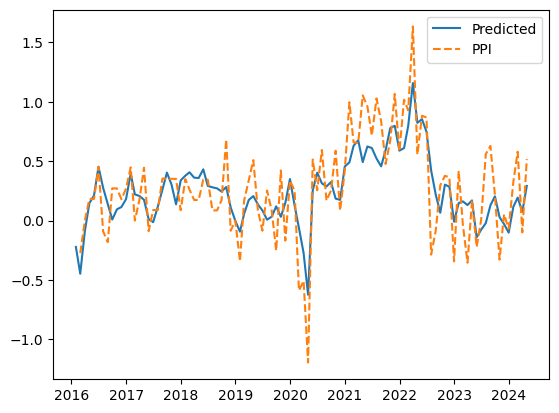

In [27]:
plt.plot(preds_dfs[0].index[-cutoff:], preds_dfs[0][var_name][-cutoff:], label='Predicted')
plt.plot(data.index[-cutoff:], data[var_name][-cutoff:], label=var_name, linestyle='--')
plt.legend()
plt.show()

In [28]:
errors_df[missing_vars]

,PPI,Core PPI
0,0.262736,0.246086


In [29]:
def get_r_squared(var_name, pred_df, actual_df):
    r2 = np.round(np.corrcoef(pred_df[var_name], actual_df[var_name])[1][0]**2*100, 1)
    return r2

mse = errors_df[var_name][0]
r2 = get_r_squared(var_name, preds_dfs[0], data[start_point:-1])

print(f"Root Mean Squared Error: {mse}")
print(f"R-Squared : {r2}")

Root Mean Squared Error: 0.2627356887116164
R-Squared : 60.7


#### Naive Forecast

In [30]:
mse = ((((data[-cutoff:-1] - data[-cutoff:-1].shift(1)).dropna()**2).mean())**0.5)[var_name]
r2 = get_r_squared(var_name, data[-cutoff:-1].shift(1).dropna(), data[-cutoff+1:-1])

print(f"Root Mean Squared Error: {mse}")
print(f"R-Squared : {r2}")

Root Mean Squared Error: 0.4306285400306709
R-Squared : 20.8


#### AR(1) Model

In [31]:
from statsmodels.regression.linear_model import OLS
from statsmodels.tools.tools import add_constant

def fit_ar1_initial_slice(data, initial_slice):
    """
    Fit AR(1) model to the initial slice of the data.
    
    Parameters:
    data (array-like): The dataset.
    initial_slice (int): The end index of the initial slice of data to fit the model on.
    
    Returns:
    tuple: Fitted values of c (intercept) and phi (coefficient).
    """
    # Prepare the lagged version of the series
    X = data[:initial_slice-1]
    Y = data[1:initial_slice]
    X = add_constant(X)  # Add intercept term
    
    # Fit the model
    model = OLS(Y, X).fit()
    
    return model.params[0], model.params[1]  # Intercept (c) and coefficient (phi)

def predict_ar1(c, phi, X_prev):
    """
    Predict the next value in an AR(1) process.
    
    Parameters:
    c (float): Intercept term from AR(1) model.
    phi (float): Coefficient from AR(1) model.
    X_prev (float): The previous observed value in the series.
    
    Returns:
    float: Predicted next value of the series.
    """
    return c + phi * X_prev

def evaluate_recursive_ar1(data, initial_slice):
    """
    Evaluate the predictive performance of a recursive AR(1) on a dataset.
    
    Parameters:
    data (array-like): The dataset to be used.
    initial_slice (int): The end index of the initial slice of data to fit the model on.
    
    Returns:
    float: Mean Squared Error of the predictions.
    """
    # Fit the AR(1) model on the initial slice
    c, phi = fit_ar1_initial_slice(data, initial_slice)
    
    # Initialize list to store predictions
    predictions = []
    
    # Predict and update step
    for t in range(initial_slice, len(data)):
        X_prev = data[t-1]
        pred = predict_ar1(c, phi, X_prev)
        predictions.append(pred)
    
    # Calculate Mean Squared Error
    mse = np.mean((data[initial_slice:] - predictions)**2)**0.5
    r2 = np.corrcoef(data[initial_slice:], predictions)**2
    return predictions, mse, r2

predictions, mse, r2 = evaluate_recursive_ar1(np.array(data[:-1][var_name]), cutoff)
print(f"Root Mean Squared Error: {mse}")
print(f"R-Squared : {np.round(r2[1][0]*100,1)}")

Root Mean Squared Error: 0.44245410229085
R-Squared : 21.9


#### Cleveland Fed

In [32]:
file_path = Path("cleveland_fed_nowcast.xlsx")
cleveland_df = pd.read_excel(file_path).set_index('date').dropna().drop_duplicates().reset_index()
cleveland_df = cleveland_df[cleveland_df['date'] < '2024-02-01']

cleveland_df = cleveland_df[cleveland_df['date'].dt.day < 10]

cleveland_df['prev_date'] = cleveland_df['date'].shift(-1)

# Keep only the rows where the month of the date is different from the month of the next date
# Or if it's the last row, as the shift would introduce a NaT (not a time) value
cleveland_df = cleveland_df[(cleveland_df['date'].dt.month != cleveland_df['prev_date'].dt.month) | (cleveland_df['prev_date'].isna())]

cleveland_df['date'] = cleveland_df['date'] + pd.offsets.MonthEnd()
cleveland_df = cleveland_df.drop(columns='prev_date').set_index('date')

cleveland_df = cleveland_df[cleveland_df[var_name] < 1]

KeyError: 'PPI'

In [ ]:
cleveland_cutoff = len(cleveland_df)
mse = ((((cleveland_df - data[['CPI', 'Core CPI', 'PCE', 'Core PCE']][data.index >= cleveland_df.index[0]])**2).mean())**0.5)[var_name]
r2 = get_r_squared(var_name, cleveland_df, data[data.index.isin(cleveland_df.index)])


print(f"Root Mean Squared Error: {mse}")
print(f"R-Squared : {r2}")

In [ ]:
plt.plot(cleveland_df.index, cleveland_df[var_name], label='Predicted')
plt.plot(data.index[-cleveland_cutoff:], data[var_name][-cleveland_cutoff:], label=var_name, linestyle='--')
plt.legend()
plt.show()

In [ ]:
## Post CPI Release
cleveland_df = pd.read_excel(file_path).set_index('date').dropna().drop_duplicates().reset_index()
cleveland_df = cleveland_df[cleveland_df['date'] < '2024-02-01']

cleveland_df = cleveland_df[cleveland_df['date'].dt.day > 20]

cleveland_df = cleveland_df[cleveland_df['date'].dt.dayofweek.isin([3, 4, 5])]

cleveland_df['prev_date'] = cleveland_df['date'].shift(-1)

# Keep only the rows where the month of the date is different from the month of the next date
# Or if it's the last row, as the shift would introduce a NaT (not a time) value
cleveland_df = cleveland_df[(cleveland_df['date'].dt.month != cleveland_df['prev_date'].dt.month) | (cleveland_df['prev_date'].isna())]

cleveland_df['date'] = cleveland_df['date'] -timedelta(days=1) + pd.offsets.MonthEnd()

cleveland_df = cleveland_df.drop(columns='prev_date').set_index('date')

In [ ]:
cleveland_df = cleveland_df[cleveland_df[var_name] < 1]

In [ ]:
cleveland_cutoff = len(cleveland_df)
mse = ((((cleveland_df - data[['CPI', 'Core CPI', 'PCE', 'Core PCE']][data.index >= cleveland_df.index[0]])**2).mean())**0.5)[var_name]
r2 = get_r_squared(var_name, cleveland_df, data[data.index.isin(cleveland_df.index)])

print(f"Root Mean Squared Error: {mse}")
print(f"R-Squared : {r2}")

In [ ]:
plt.plot(cleveland_df.index, cleveland_df[var_name], label='Predicted')
plt.plot(data.index[-cleveland_cutoff:], data[var_name][-cleveland_cutoff:], label=var_name, linestyle='--')
plt.legend()
plt.show()

In [ ]:
## VS Model Forecasts for Same Time Window

mse = ((((preds_dfs[0][['CPI', 'Core CPI', 'PCE', 'Core PCE']][-cleveland_cutoff:] - data[['CPI', 'Core CPI', 'PCE', 'Core PCE']][-cleveland_cutoff:-1]).dropna()**2).mean())**0.5)[var_name]
r2 = get_r_squared(var_name, preds_dfs[0], data[start_point:-1])

print(f"Root Mean Squared Error: {mse}")
print(f"R-Squared : {r2}")